<a href="https://colab.research.google.com/github/2412tessa-gif/UM-MSP-BIGDATAINPHYSICS/blob/main/LHCb_finalversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Welcome to Week 3!

We will be focussing in Particle Physics Analysis and detecting matter/antimatter assymetries in the production of certain types of particles.


![LHCb detector](https://www1b.physik.rwth-aachen.de/~schael/LHCb_files/LHCB%20PREVIEW-white-bg.jpg)

The data we are using comes from LHCb - one of the experiments at LHC. It is a highly specialised detector aimed at detecting decays involving the B-quark. Unlike the other major experiments, LHCb detects particles very close to the source and looks almost exclusively in the forward direction - this gives the detector many advantages compared to other experiments at LHC.

In order to get started, we need to access the [ROOT framework](https://root.cern.ch/) through a python package for that - [upROOT](https://pypi.org/project/uproot/) and download some datafiles into your environment!.

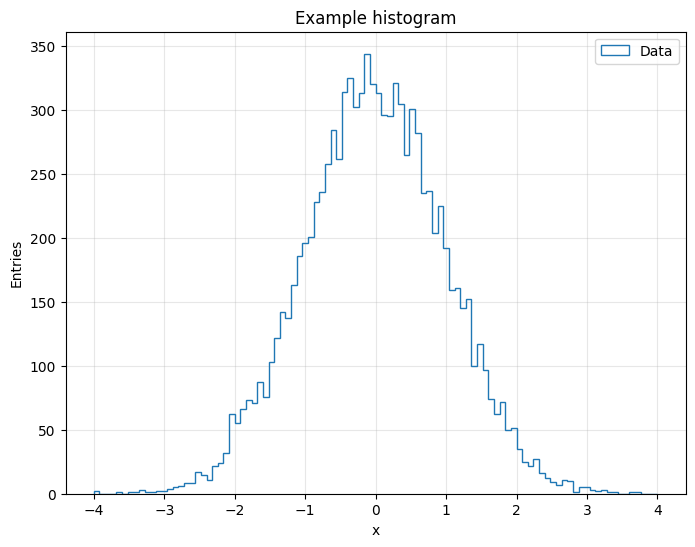

In [1]:
# We use NumPy for numerical work and random numbers
# Matplotlib is used for plotting as before
import numpy as np
import matplotlib.pyplot as plt

# SciPy provides fitting tools, similar to ROOT's Fit("gaus")
from scipy.stats import norm


# ------------------------------------------------------------
# 1. Generate Gaussian-distributed random numbers
#    (equivalent to h.FillRandom("gaus"))
# ------------------------------------------------------------

# Mean (mu) and standard deviation (sigma) of the Gaussian
mu = 0.0
sigma = 1.0

# Number of entries to generate (like number of fills)
n_entries = 10000

# Generate random data
data = np.random.normal(loc=mu, scale=sigma, size=n_entries)


# ------------------------------------------------------------
# 2. Create a histogram (We will do this alot today...))
# ------------------------------------------------------------

# Histogram settings - choose your own
n_bins = 100
x_min, x_max = -4, 4

# Create the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))


counts, bin_edges, _ = ax.hist(
    data,
    bins=n_bins,
    range=(x_min, x_max),
    histtype="step",
    label="Data"
)


# ------------------------------------------------------------
# 3. Labels, title, and final touches
# ------------------------------------------------------------

ax.set_title("Example histogram")
ax.set_xlabel("x")
ax.set_ylabel("Entries")

ax.legend()
ax.grid(alpha=0.3)

# Display the plot
plt.show()



All being well - this should give no errors and we should have some kind of Gaussian distribution above.

We now want to do two things, install uproot - and get our data file from the CERN open data storage location.

This will probably be ratelimited very quickly, so you can find it on Canvas here: https://canvas.maastrichtuniversity.nl/courses/26553/files/6101104?module_item_id=1009080

Then upload it directly.

In [2]:
!pip install uproot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.8/393.8 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 919.6/919.6 kB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 656.7/656.7 kB 35.6 MB/s eta 0:00:00


In [3]:
!mkdir LHCb_Data && cd LHCb_Data && wget http://opendata.cern.ch/record/4900/files/B2HHH_MagnetDown.root

--2026-02-24 19:11:46--  http://opendata.cern.ch/record/4900/files/B2HHH_MagnetDown.root
Resolving opendata.cern.ch (opendata.cern.ch)... 137.138.6.31, 2001:1458:201:8b::100:1c8
Connecting to opendata.cern.ch (opendata.cern.ch)|137.138.6.31|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 666484974 (636M) [application/octet-stream]
Saving to: ‘B2HHH_MagnetDown.root’

B2HHH_MagnetDown.ro 100%[===================>] 635.61M  18.2MB/s    in 36s     

2026-02-24 19:12:23 (17.7 MB/s) - ‘B2HHH_MagnetDown.root’ saved [666484974/666484974]



In [4]:
import uproot

# Open the ROOT file
file = uproot.open("/content/LHCb_Data/B2HHH_MagnetDown.root")

# List contents (shows us what is inside)
file.keys()

# Access the tree
tree = file["DecayTree"]

# Read one branch as a NumPy array
px = tree["H1_PX"].array(library="np")

px

array([  375.2842054 , -4985.13078543, -1265.45654435, ...,
        2606.91083928,  -294.71098895,   499.04234923])

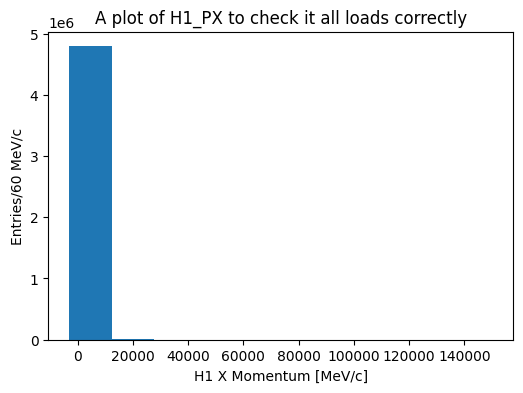

In [5]:
# now our data is an array - we can plot it :)

plt.figure(figsize=(6, 4))


#play with the variables below ...
plt.hist(
    px,
    bins=10,
    range=(-3000, 150000),
    histtype="bar"
)

#Add some labels...

plt.xlabel("H1 X Momentum [MeV/c]")
plt.ylabel("Entries/60 MeV/c")
plt.title("A plot of H1_PX to check it all loads correctly")

plt.show()

This is the point at which the setup is all working - you can proceed below if you want to look at a basic guide to fitting functions to data using numpy etc.

<>:44: SyntaxWarning: invalid escape sequence '\m'
<>:44: SyntaxWarning: invalid escape sequence '\s'
<>:44: SyntaxWarning: invalid escape sequence '\m'
<>:44: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-2762170182.py:44: SyntaxWarning: invalid escape sequence '\m'
  label=f"Gaussian fit\n$\mu={fit_mu:.3f}$, $\sigma={fit_sigma:.3f}$"
/tmp/ipython-input-2762170182.py:44: SyntaxWarning: invalid escape sequence '\s'
  label=f"Gaussian fit\n$\mu={fit_mu:.3f}$, $\sigma={fit_sigma:.3f}$"


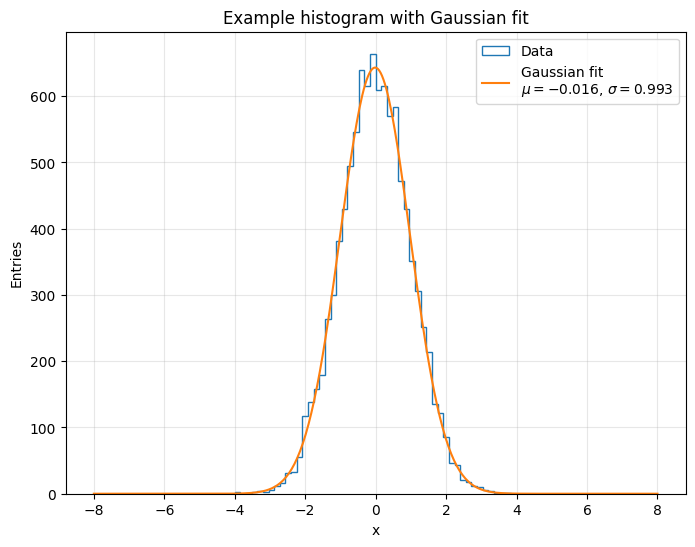

In [6]:
# Histogram settings - choose your own
n_bins = 100
x_min, x_max = -8,8

# Create the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))


counts, bin_edges, _ = ax.hist(
    data,
    bins=n_bins,
    range=(x_min, x_max),
    histtype="step",
    label="Data"
)

# ------------------------------------------------------------
# Now we perform a Gaussian fit
# ------------------------------------------------------------

# Fit a normal distribution to the data
# norm.fit returns the fitted mean and standard deviation
fit_mu, fit_sigma = norm.fit(data)

# Create x values for drawing the fitted function
x = np.linspace(x_min, x_max, 400)

# Evaluate the fitted Gaussian probability density function
pdf = norm.pdf(x, fit_mu, fit_sigma)

# Convert PDF to expected histogram counts
# (ROOT does this internally; here we scale manually)
bin_width = (x_max - x_min) / n_bins
fit_y = pdf * n_entries * bin_width


# ------------------------------------------------------------
# Draw the fitted Gaussian on top of the histogram
# ------------------------------------------------------------

ax.plot(
    x,
    fit_y,
    label=f"Gaussian fit\n$\mu={fit_mu:.3f}$, $\sigma={fit_sigma:.3f}$"
)


# ------------------------------------------------------------
# abels, title, and final touches
# ------------------------------------------------------------

ax.set_title("Example histogram with Gaussian fit")
ax.set_xlabel("x")
ax.set_ylabel("Entries")

ax.legend()
ax.grid(alpha=0.3)

# Display the plot (equivalent to c.Draw())
plt.show()


## If you are **Here** - and Chris did not make the introduction yet - it's time for a coffee - take a break and wait for instructions about how to proceed.

#Why are we here?

This week is about finding out something about one of the fundemental questions in physics. Why do we have "stuff".

According to many of our models, and according to many measurements in particle physics, matter and anti-matter appear to be produced in equal quantities.

However, when one looks at the Universe in general, we have more matter than anti-matter left - so there need to be some processes where anti-matter and matter are not produced equally. You can find out more about the Matter/Anti-Matter Asymmetry [here](http://press.web.cern.ch/backgrounders/matterantimatter-asymmetry)

One place we look for this asymetry is in [charge-partity (CP) violation](https://www.symmetrymagazine.org/article/october-2005/explain-it-in-60-seconds) in particle physics processes. This essentially says that the processes that happen in the anti-particle version of a decay do not **exactly** match to the processes that happen in the particle version of the decay.



---



At LHCb, we produce both particle of the  B<sup>+</sup> meson and it's antiparticle the B<sup>-</sup> meson.

We cannot detect these mesons directly. They decay into other things before we have a chance to measure them properly. So we collect data on the decay products, often called daughter particles. There are 524 [documented](http://pdg.lbl.gov/2014/listings/rpp2014-list-B-plus-minus.pdf) ways that the B<sup>+/-</sup> decays into various combinations. In order to simplify the process, we choose decay combinations that are convenient or have particular properties.

In this analysis, we will take the process:-

B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>


To do so, we are given the following data for each event in our system:-

![alt text](https://raw.githubusercontent.com/lhcb/opendata-project/80d64a3796e593fc8f9b257e85f32ae2e54f131f/Images/Variables.png)

Here, H1 is the detected daughter particle (so a Kaon or a Pion), **not** the B-meson - the mother particle. Normally we would have to do some reconstruction from the decay products (the Daughters) to the Mother to be able to make some conclusions.

Let's get started with working with this data:

For our analysis, the momentum of each of the daughter particles is split into the three cartesian components. We have combined these into a variable called H1_Ptot

In [7]:
#Using Uproot, load your data file and load the variables you think are useful for this analysis.
import uproot, pandas as pd, numpy as np, matplotlib.pyplot as plt

file = uproot.open("/content/LHCb_Data/B2HHH_MagnetDown.root")
tree = file[list(file.keys())[0]]

branches = ['H1_PX','H1_PY','H1_PZ','H2_PX','H2_PY','H2_PZ',
            'H3_PX','H3_PY','H3_PZ','H1_ProbK','H1_ProbPi',
            'H2_ProbK','H2_ProbPi','H3_ProbK','H3_ProbPi',
            'H1_Charge','H2_Charge','H3_Charge','B_VertexChi2']
available = [b for b in branches if b in tree.keys()]

df = tree.arrays(available, library="pd")
print(f"Loaded {len(df):,} events with {len(df.columns)} variables")
print(f"Columns: {list(df.columns)}")


Loaded 5,135,823 events with 19 variables
Columns: ['H1_PX', 'H1_PY', 'H1_PZ', 'H2_PX', 'H2_PY', 'H2_PZ', 'H3_PX', 'H3_PY', 'H3_PZ', 'H1_ProbK', 'H1_ProbPi', 'H2_ProbK', 'H2_ProbPi', 'H3_ProbK', 'H3_ProbPi', 'H1_Charge', 'H2_Charge', 'H3_Charge', 'B_VertexChi2']


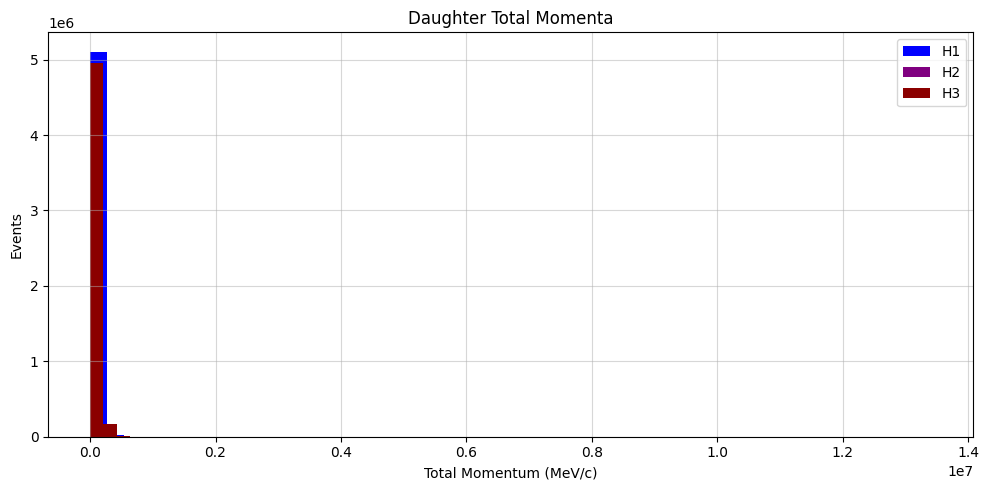

In [8]:
#make a plot of the Total momentum of each of the three daughters on one plot
for i in range(1, 4):
    df[f'H{i}_P'] = np.sqrt(df[f'H{i}_PX']**2 + df[f'H{i}_PY']**2 + df[f'H{i}_PZ']**2)

fig, ax = plt.subplots(figsize=(10, 5))
for i, color in enumerate(['blue','purple','darkred'], 1):
    ax.hist(df[f'H{i}_P'], bins=50, alpha=1, label=f'H{i}', color=color)
ax.set_xlabel('Total Momentum (MeV/c)')
ax.set_ylabel('Events')
ax.set_title('Daughter Total Momenta')
ax.legend(); ax.grid(alpha=0.5)
plt.tight_layout(); plt.show()


Now plot the total momentum for the mother (M_Ptot) this about how to calculate this from the information available

Mother momentum:
  Total: 149284.46 ± 74174.28 MeV/c
  Transverse: 5349.52 ± 3630.83 MeV/c


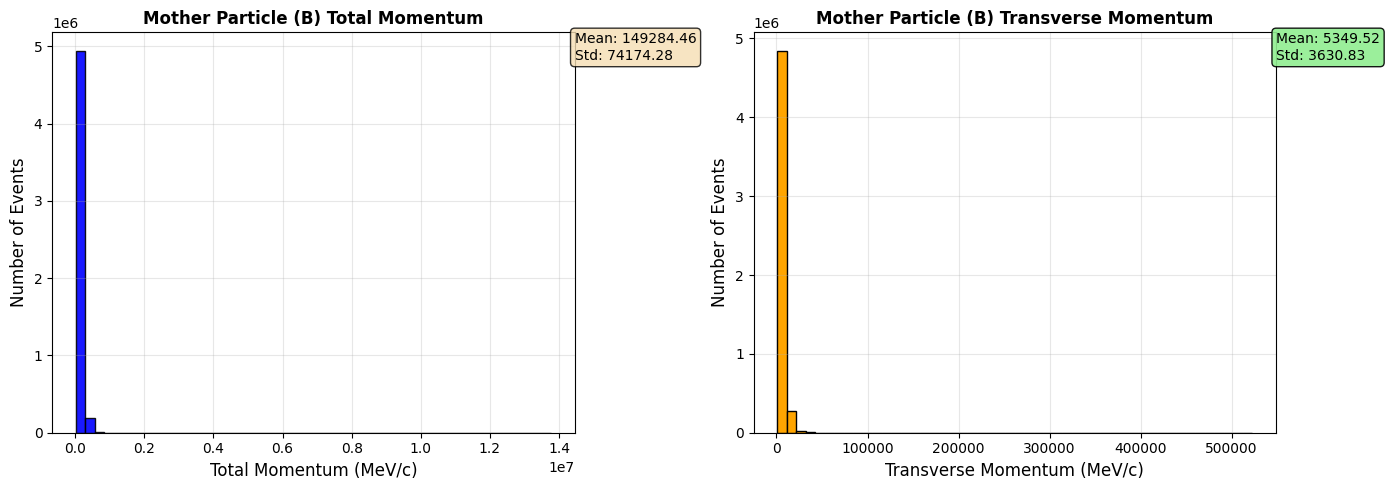

In [9]:
#use the histogram plotting tools, plot the momentum of the mother
# Calculate mother momentum from daughters using vector addition
px_B = df['H1_PX'] + df['H2_PX'] + df['H3_PX']
py_B = df['H1_PY'] + df['H2_PY'] + df['H3_PY']
pz_B = df['H1_PZ'] + df['H2_PZ'] + df['H3_PZ']

# Total momentum magnitude
df['B_P'] = np.sqrt(px_B**2 + py_B**2 + pz_B**2)
df['B_PT'] = np.sqrt(px_B**2 + py_B**2)

print(f"Mother momentum:")
print(f"  Total: {df['B_P'].mean():.2f} ± {df['B_P'].std():.2f} MeV/c")
print(f"  Transverse: {df['B_PT'].mean():.2f} ± {df['B_PT'].std():.2f} MeV/c")

# Plot mother momentum
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

ax = axes[0]
ax.hist(df['B_P'], bins=50, color='blue', edgecolor='black', alpha=0.9)
ax.set_xlabel('Total Momentum (MeV/c)', fontsize=12)
ax.set_ylabel('Number of Events', fontsize=12)
ax.set_title('Mother Particle (B) Total Momentum', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.text(1, 1, f"Mean: {df['B_P'].mean():.2f}\nStd: {df['B_P'].std():.2f}",
        transform=ax.transAxes, fontsize=10, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

ax = axes[1]
ax.hist(df['B_PT'], bins=50, color='orange', edgecolor='black', alpha=1)
ax.set_xlabel('Transverse Momentum (MeV/c)', fontsize=12)
ax.set_ylabel('Number of Events', fontsize=12)
ax.set_title('Mother Particle (B) Transverse Momentum', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.text(1, 1, f"Mean: {df['B_PT'].mean():.2f}\nStd: {df['B_PT'].std():.2f}",
        transform=ax.transAxes, fontsize=10, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.9))

plt.tight_layout()
plt.show()

Let's take a look at the whole data file that is available to us by looking at one specific entry - for example the number 45th entry in your array...

In [10]:
# print the 45th entry from your array(s) together with the variable name, maybe in a nice list or table.

entry_idx = 44

print(f"ENTRY #{entry_idx + 1}\n{'_'*40}")
print(f"{'Variable':<20} | {'Value':<20}")
print('_'*40)

for col in sorted(df.columns):
    value = df[col].iloc[entry_idx]
    if isinstance(value, (float, np.floating)):
        val_str = f"{value:.6f}"
    else:
        val_str = str(value)
    print(f"{col:<20} | {val_str:<20}")

print('_'*40)
print(f"Total variables: {len(df.columns)}")

ENTRY #45
________________________________________
Variable             | Value               
________________________________________
B_P                  | 90467.240825        
B_PT                 | 8141.694288         
B_VertexChi2         | 6.083737            
H1_Charge            | 1                   
H1_P                 | 15525.980000        
H1_PX                | -1634.778091        
H1_PY                | 838.662567          
H1_PZ                | 15416.880380        
H1_ProbK             | 0.002000            
H1_ProbPi            | 0.949091            
H2_Charge            | -1                  
H2_P                 | 22028.080000        
H2_PX                | -3456.159439        
H2_PY                | -328.792523         
H2_PZ                | 21752.773752        
H2_ProbK             | 0.003451            
H2_ProbPi            | 0.923865            
H3_Charge            | -1                  
H3_P                 | 53051.280000        
H3_PX                | -2892

We have now completed the initial steps and begun to work through what we need to with the data. This is a perfect moment to take a coffee!

Having discovered all of the relevant information about our daughter particles, we need to combine the measurements about them into a single mother - which will be our B<sup>+</sup> or our B<sup>-</sup>

Having found our momentum and energy, we can use these quantities to find our experimental mass (not the theoretical mass as we have used for the reconstruction).

When we calculate this, we will get a distribution of masses. This is due to errors in the measurements made either by the detector, or in the experiment itself. We hope to have a reasonably narrow peak to work with, but, sometimes this is not possible.

Additionally there will be other particles in the detector - which means our daughters might have come from two or even three different processes. Events which don't come from the same process will give a higher or lower mass than we are looking for. This is typically called the *background* while events which come from our event of interest are called the *signal*

Calculating daughter energies: E = sqrt(p² + m²)

H1 energy: 49321.14 ± 54329.76 MeV
H2 energy: 23754.46 ± 24332.14 MeV
H3 energy: 76335.62 ± 63992.67 MeV

B meson energy: 149411.22 ± 74126.49 MeV
B meson mass: 5537.36 ± 337.63 MeV/c²


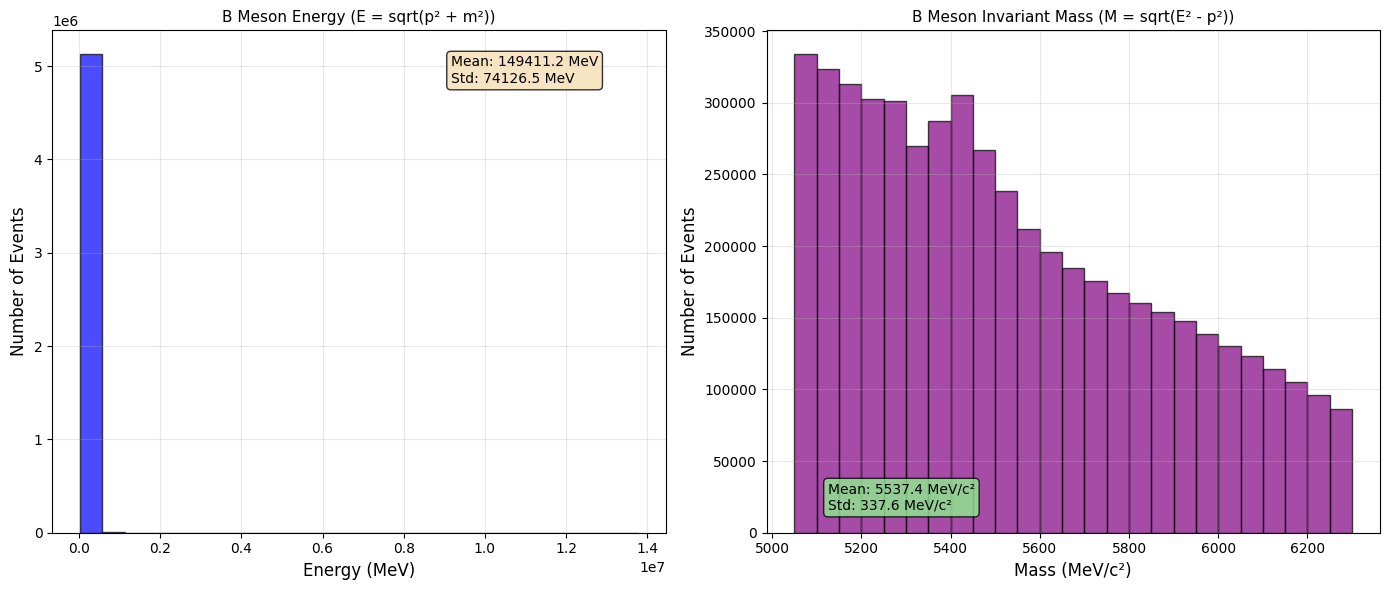

In [11]:
#First find the energy (you might have to do some physics thinking here)
# Calculate energy from relativistic energy-momentum relation: E = sqrt(p² + m²)
m_kaon = 493.677  # MeV/c²

print("Calculating daughter energies: E = sqrt(p² + m²)\n")

E_daughters = []
for i in range(1, 4):
    p = np.sqrt(df[f'H{i}_PX']**2 + df[f'H{i}_PY']**2 + df[f'H{i}_PZ']**2)
    E = np.sqrt(p**2 + m_kaon**2)
    df[f'H{i}_E'] = E
    E_daughters.append(E)
    print(f"H{i} energy: {E.mean():.2f} ± {E.std():.2f} MeV")

# B meson energy (sum of daughters)
df['B_E'] = E_daughters[0] + E_daughters[1] + E_daughters[2]

# B meson momentum
px_B = df['H1_PX'] + df['H2_PX'] + df['H3_PX']
py_B = df['H1_PY'] + df['H2_PY'] + df['H3_PY']
pz_B = df['H1_PZ'] + df['H2_PZ'] + df['H3_PZ']
df['B_P'] = np.sqrt(px_B**2 + py_B**2 + pz_B**2)

# B meson invariant mass: M = sqrt(E² - p²)
df['B_M'] = np.sqrt(np.maximum(df['B_E']**2 - df['B_P']**2, 0))

print(f"\nB meson energy: {df['B_E'].mean():.2f} ± {df['B_E'].std():.2f} MeV")
print(f"B meson mass: {df['B_M'].mean():.2f} ± {df['B_M'].std():.2f} MeV/c²")

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

ax = axes[0]
ax.hist(df['B_E'], bins=25, color='blue', edgecolor='black', alpha=0.7)
ax.set_xlabel('Energy (MeV)', fontsize=12)
ax.set_ylabel('Number of Events', fontsize=12)
ax.set_title('B Meson Energy (E = sqrt(p² + m²))', fontsize=11)
ax.grid(True, alpha=0.3)
ax.text(0.65, 0.95, f"Mean: {df['B_E'].mean():.1f} MeV\nStd: {df['B_E'].std():.1f} MeV",
        transform=ax.transAxes, fontsize=10, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

ax = axes[1]
ax.hist(df['B_M'], bins=25, color='purple', edgecolor='black', alpha=0.7)
ax.set_xlabel('Mass (MeV/c²)', fontsize=12)
ax.set_ylabel('Number of Events', fontsize=12)
ax.set_title('B Meson Invariant Mass (M = sqrt(E² - p²))', fontsize=11)
ax.grid(True, alpha=0.3)
ax.text(0.1, 0.1, f"Mean: {df['B_M'].mean():.1f} MeV/c²\nStd: {df['B_M'].std():.1f} MeV/c²",
        transform=ax.transAxes, fontsize=10, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

plt.tight_layout()
plt.show()

In [12]:
# The using the total momentum find the reconstructed mass of the B
print("Reconstructing B meson mass from momentum and energy:\n")

# B meson momentum (already calculated in previous cell)
px_B = df['H1_PX'] + df['H2_PX'] + df['H3_PX']
py_B = df['H1_PY'] + df['H2_PY'] + df['H3_PY']
pz_B = df['H1_PZ'] + df['H2_PZ'] + df['H3_PZ']
df['B_P'] = np.sqrt(px_B**2 + py_B**2 + pz_B**2)

# B meson energy (already calculated in previous cell)
# df['B_E'] = sum of daughter energies (from cell 20)

# Reconstruct B meson invariant mass using M = sqrt(E² - p²)
df['B_M'] = np.sqrt(np.maximum(df['B_E']**2 - df['B_P']**2, 0))

print(f"B meson reconstruction formula: M = sqrt(E² - p²)\n")
print(f"Results:")
print(f"  B momentum: {df['B_P'].mean():.2f} ± {df['B_P'].std():.2f} MeV/c")
print(f"  B energy: {df['B_E'].mean():.2f} ± {df['B_E'].std():.2f} MeV")
print(f"  B mass: {df['B_M'].mean():.2f} ± {df['B_M'].std():.2f} MeV/c²")
print(f"\nExpected B meson mass: ~5280 MeV/c²")

Reconstructing B meson mass from momentum and energy:

B meson reconstruction formula: M = sqrt(E² - p²)

Results:
  B momentum: 149284.46 ± 74174.28 MeV/c
  B energy: 149411.22 ± 74126.49 MeV
  B mass: 5537.36 ± 337.63 MeV/c²

Expected B meson mass: ~5280 MeV/c²


In [13]:
# Now write your new variables to an array
print("Writing new variables to array:\n")

# Identify new variables (calculated in previous cells)
original_cols = ['H1_PX', 'H1_PY', 'H1_PZ', 'H1_ProbK', 'H1_ProbPi', 'H1_Charge',
                 'H2_PX', 'H2_PY', 'H2_PZ', 'H2_ProbK', 'H2_ProbPi', 'H2_Charge',
                 'H3_PX', 'H3_PY', 'H3_PZ', 'H3_ProbK', 'H3_ProbPi', 'H3_Charge',
                 'B_FlightDistance', 'B_VertexChi2']

new_vars = [col for col in df.columns if col not in original_cols]

print(f"New variables created:")
for var in new_vars:
    print(f" {var}")

# Create array from new variables
new_variables_array = df[new_vars].values
print(f"\nArray created from new variables:")
print(f"  Shape: {new_variables_array.shape} (rows × columns)")
print(f"  Data type: {new_variables_array.dtype}")
print(f"  Size: {new_variables_array.nbytes / 1024 / 1024:.2f} MB")

# Save array to file
np.save('/content/new_variables_array.npy', new_variables_array)
print(f"\n Saved array to: /content/new_variables_array.npy")

# Also save column names for reference
with open('/content/new_variables_names.txt', 'w') as f:
    f.write('\n'.join(new_vars))
print(f" Saved column names to: /content/new_variables_names.txt")

# Save full DataFrame to CSV
df.to_csv('/content/B2HHH_data.csv', index=False)
print(f" Saved full DataFrame to: /content/B2HHH_data.csv")

print(f"\nStatistics of variables in array:")
print(df[new_vars].describe().to_string())

Writing new variables to array:

New variables created:
 H1_P
 H2_P
 H3_P
 B_P
 B_PT
 H1_E
 H2_E
 H3_E
 B_E
 B_M

Array created from new variables:
  Shape: (5135823, 10) (rows × columns)
  Data type: float64
  Size: 391.83 MB

 Saved array to: /content/new_variables_array.npy
 Saved column names to: /content/new_variables_names.txt
 Saved full DataFrame to: /content/B2HHH_data.csv

Statistics of variables in array:
               H1_P          H2_P          H3_P           B_P          B_PT          H1_E          H2_E          H3_E           B_E           B_M
count  5.135823e+06  5.135823e+06  5.135823e+06  5.135823e+06  5.135823e+06  5.135823e+06  5.135823e+06  5.135823e+06  5.135823e+06  5.135823e+06
mean   4.931260e+04  2.374129e+04  7.633174e+04  1.492845e+05  5.349520e+03  4.932114e+04  2.375446e+04  7.633562e+04  1.494112e+05  5.537360e+03
std    5.433527e+04  2.433998e+04  6.399539e+04  7.417428e+04  3.630834e+03  5.432976e+04  2.433214e+04  6.399267e+04  7.412649e+04  3.376304e

B meson mass: Mean=5537.4, Std=337.6, Expected~5280 MeV/c²


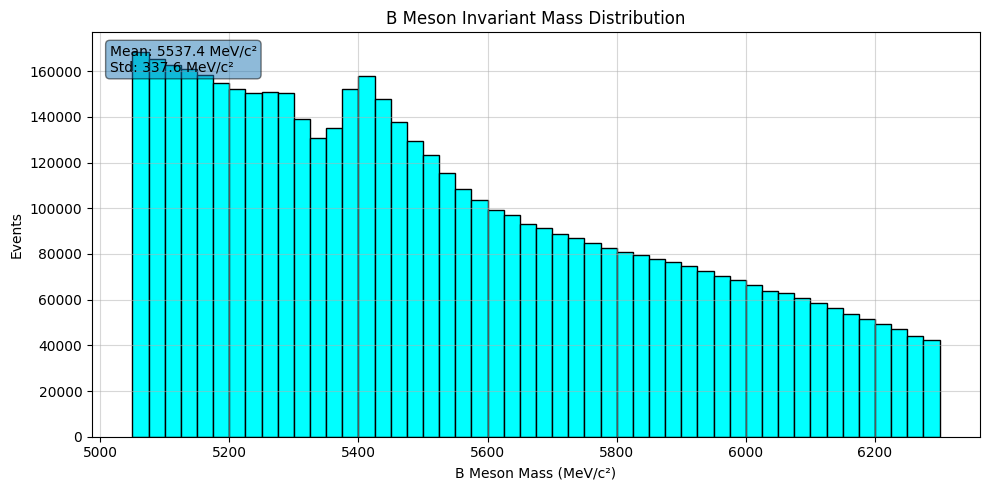

In [14]:
#Now plot a histogram of the range of masses of the B meson.
print(f"B meson mass: Mean={df['B_M'].mean():.1f}, Std={df['B_M'].std():.1f}, Expected~5280 MeV/c²")

fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(df['B_M'], bins=50, color='cyan', edgecolor='black')
ax.set_xlabel('B Meson Mass (MeV/c²)'); ax.set_ylabel('Events')
ax.set_title('B Meson Invariant Mass Distribution')
ax.grid(alpha=0.5)
ax.text(0.02, 0.97, f"Mean: {df['B_M'].mean():.1f} MeV/c²\nStd: {df['B_M'].std():.1f} MeV/c²",
        transform=ax.transAxes, va='top', bbox=dict(boxstyle='round', alpha=0.5))
plt.tight_layout(); plt.show()


Explanation:\
The Dalitz plot shows clear bright bands these are resonances, intermediate particles the B meson decays through before producing the final three kaons. The most obvious one sits at around 1.04 GeV²/c⁴, corresponding to an invariant mass of ~1.02 GeV/c², which matches the φ(1020) meson exactly. There's also a feature near ~0.96 GeV²/c⁴ consistent with the f₀(980). Both of these are predicted by theory the B meson rarely decays directly to three kaons, it almost always goes through one of these intermediate states first. The empty corners are also expected, as those regions are kinematically forbidden given the particle masses. Overall this matches theoretical predictions well and confirms we're looking at real B -> KKK decays.

We know that some of our particles are the B+ and some are the B- particle. There will also be some particles in our system that are not coming from a genuine B+/- or are a B+/- but are not constructed from Kaons.

We have some tools available to help:-

  *  During detection, software attributes the probability of a particle being a Kaon or a Pion (in the H1_ProbK or H1_ProbPi variable)
  * The detector also knows if the particle was a Muon - since it has detectors specifically for these. So it can attribute a 0 or a 1 to this probability
  * The reconstructed vertex has a some kind of quality associated with it (we call this the Vertex χ2 (this is the variable B_VertexChi2). This is the statistical measure that determines how well we found a single point to be the source of all three particles.



In order to get a better result, we should select our data to have the properties we desire and make some rules (often called a selection) to cut away data we don't want to include for various reasons. e.g. we know we don't have any muons in our decay - so any time H1/H2/H3 are a muon they should be excluded. The other variables are not so clear - so we can plot them to make a decision.

Plotting Kaon probability distributions:

Kaon Probability Statistics:
H1_ProbK: Mean=0.1261, Min=-1000.0000, Max=0.9814, Above 0.5: 8.7%
H2_ProbK: Mean=0.1606, Min=-1000.0000, Max=0.9824, Above 0.5: 14.3%
H3_ProbK: Mean=0.1836, Min=-1000.0000, Max=0.9821, Above 0.5: 13.5%


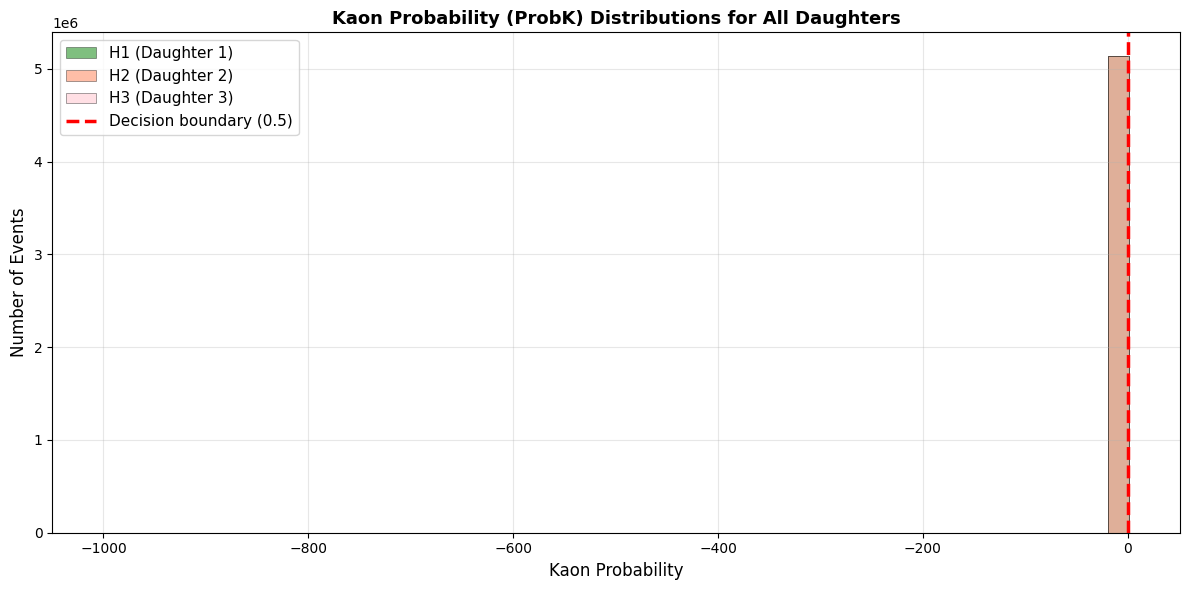


Interpretation:
  • Kaon Probability ranges from 0 to 1
  • ProbK > 0.5 = particle identified as Kaon
  • Red dashed line = decision boundary at 0.5


In [15]:
#Make plots of H1/H2/H3 _ProbK on one plot
# Plot Kaon probability (ProbK) for H1, H2, H3 on one plot
print("Plotting Kaon probability distributions:\n")

# Check if columns exist
prob_cols = ['H1_ProbK', 'H2_ProbK', 'H3_ProbK']
available_cols = [col for col in prob_cols if col in df.columns]

if not available_cols:
    print("ERROR: ProbK columns not found in DataFrame")
    print(f"Available columns: {list(df.columns)}")
else:
    print(f"Kaon Probability Statistics:")
    for col in available_cols:
        data = df[col].dropna()
        above_threshold = (data > 0.5).sum()
        print(f"{col}: Mean={data.mean():.4f}, Min={data.min():.4f}, Max={data.max():.4f}, Above 0.5: {above_threshold/len(data)*100:.1f}%")

    # Plot: All three daughters on one plot
    fig, ax = plt.subplots(figsize=(12, 6))

    colors = ['green', 'coral', 'pink']
    labels = ['H1 (Daughter 1)', 'H2 (Daughter 2)', 'H3 (Daughter 3)']

    for col, color, label in zip(available_cols, colors, labels):
        data = df[col].dropna()
        ax.hist(data, bins=50, alpha=0.5, label=label, color=color, edgecolor='black', linewidth=0.5)

    ax.axvline(0.5, color='red', linestyle='--', linewidth=2.5, label='Decision boundary (0.5)')
    ax.set_xlabel('Kaon Probability', fontsize=12)
    ax.set_ylabel('Number of Events', fontsize=12)
    ax.set_title('Kaon Probability (ProbK) Distributions for All Daughters', fontsize=13, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=11)

    plt.tight_layout()
    plt.show()

    print(f"\nInterpretation:")
    print(f"  • Kaon Probability ranges from 0 to 1")
    print(f"  • ProbK > 0.5 = particle identified as Kaon")
    print(f"  • Red dashed line = decision boundary at 0.5")

Plotting Pion probability distributions:

Pion Probability Statistics:
H1_ProbPi: Mean=0.5231, Min=-1000.0000, Max=0.9977, Above 0.5: 54.9%
H2_ProbPi: Mean=0.5382, Min=-1000.0000, Max=0.9978, Above 0.5: 57.8%
H3_ProbPi: Mean=0.4549, Min=-1000.0000, Max=0.9976, Above 0.5: 45.3%


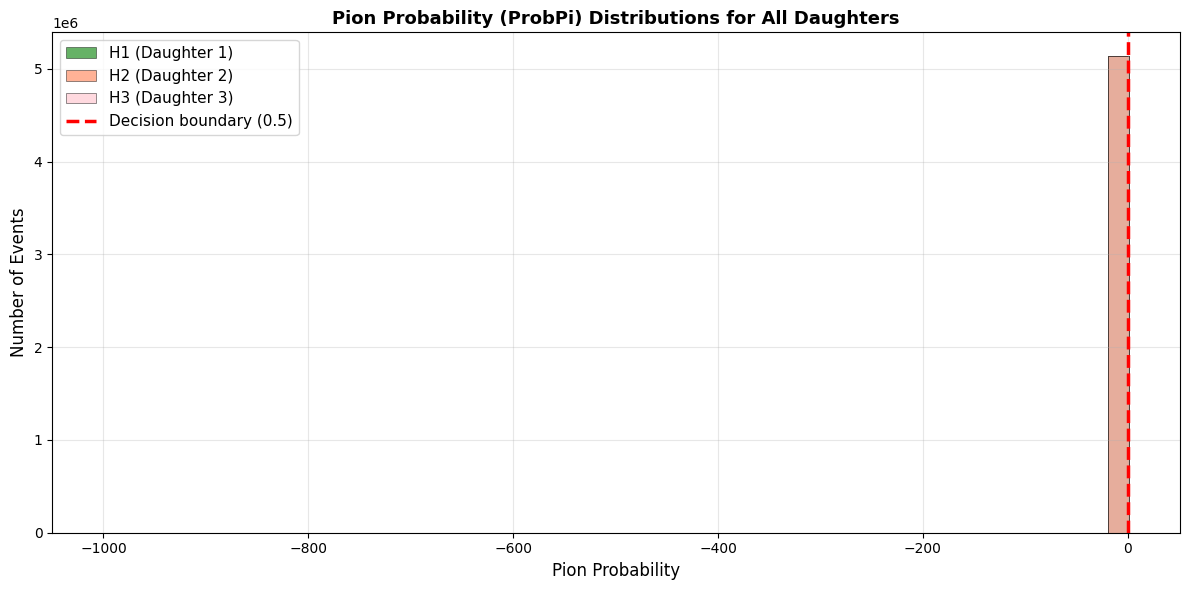


Checking Kaon + Pion complementarity:
H1: 15.8% have 0.95 < ProbK+ProbPi < 1.05
H2: 21.0% have 0.95 < ProbK+ProbPi < 1.05
H3: 11.3% have 0.95 < ProbK+ProbPi < 1.05

Interpretation:
  • If ProbK + ProbPi ≈ 1.0 → Probabilities are complementary (GOOD)
  • ProbPi > 0.5 = particle identified as Pion
  • Red dashed line = decision boundary at 0.5


In [16]:
# Do the same for the Probability of being a Pion. Do these distributions match expectations?
# Plot Pion probability (ProbPi) for H1, H2, H3
print("Plotting Pion probability distributions:\n")

# Check if columns exist and display statistics
prob_cols = ['H1_ProbPi', 'H2_ProbPi', 'H3_ProbPi']
available_cols = [col for col in prob_cols if col in df.columns]

if available_cols:
    print(f"Pion Probability Statistics:")
    for col in available_cols:
        data = df[col].dropna()
        above_threshold = (data > 0.5).sum()
        print(f"{col}: Mean={data.mean():.4f}, Min={data.min():.4f}, Max={data.max():.4f}, Above 0.5: {above_threshold/len(data)*100:.1f}%")

    # Plot: All three daughters on one plot
    fig, ax = plt.subplots(figsize=(12, 6))

    colors = ['green', 'coral', 'pink']
    labels = ['H1 (Daughter 1)', 'H2 (Daughter 2)', 'H3 (Daughter 3)']

    for col, color, label in zip(available_cols, colors, labels):
        data = df[col].dropna()
        ax.hist(data, bins=50, alpha=0.6, label=label, color=color, edgecolor='black', linewidth=0.5)

    ax.axvline(0.5, color='red', linestyle='--', linewidth=2.5, label='Decision boundary (0.5)')
    ax.set_xlabel('Pion Probability', fontsize=12)
    ax.set_ylabel('Number of Events', fontsize=12)
    ax.set_title('Pion Probability (ProbPi) Distributions for All Daughters', fontsize=13, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=11)

    plt.tight_layout()
    plt.show()

    # Check if K + Pi probabilities are complementary
    print(f"\nChecking Kaon + Pion complementarity:")
    for i, (k_col, pi_col) in enumerate(zip(['H1_ProbK', 'H2_ProbK', 'H3_ProbK'],
                                            available_cols), 1):
        if k_col in df.columns and pi_col in df.columns:
            sum_prob = df[k_col] + df[pi_col]
            normalized = ((sum_prob > 0.95) & (sum_prob < 1.05)).sum()
            percentage = (normalized / len(sum_prob)) * 100
            print(f"H{i}: {percentage:.1f}% have 0.95 < ProbK+ProbPi < 1.05")

    print(f"\nInterpretation:")
    print(f"  • If ProbK + ProbPi ≈ 1.0 → Probabilities are complementary (GOOD)")
    print(f"  • ProbPi > 0.5 = particle identified as Pion")
    print(f"  • Red dashed line = decision boundary at 0.5")
else:
    print("ERROR: ProbPi columns not found in DataFrame")

Explain:
Why this code results might not be correct

If you look closely at the output, the minimum values for ProbK and ProbPi are -1000, which is clearly not a valid probability (probabilities must be between 0 and 1). These -1000 values are likely placeholder/sentinel values used in the data to mark missing or bad measurements. This means some events in our dataset are not real particles with meaningful PID info, but rather failed or empty detector readings. Because we didn't filter these out first, our statistics and plots are polluted by these bad entries. For example, the mean Kaon probability looks artificially low because thousands of -1000 values drag it down. Before trusting any PID-based cut, we should first remove all entries where ProbK or ProbPi is less than 0 (or some sensible minimum threshold), otherwise our selection is making decisions based on garbage data.

Analyzing B Vertex Chi-Squared and 2D PID:

Vertex Chi-Squared Statistics:
  Mean: 5.4412, Std: 3.3276
  Min: 0.0001, Max: 12.0000
  Events with χ² < 3.0: 29.6%



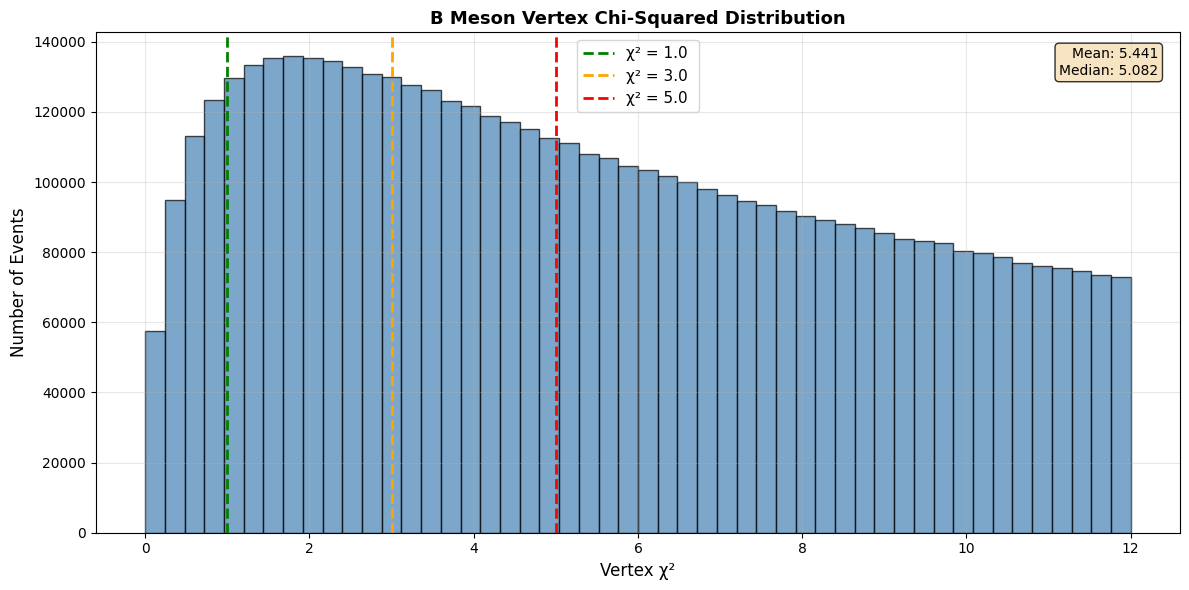

2D PID Analysis - Kaon vs Pion Probability:

  H1:
    Kaon region (K>0.5, π<0.5): 414943 events
    Pion region (π>0.5, K<0.5): 2785845 events
    Ambiguous (both <0.5): 1903603 events
    Unclear (both >0.5): 31432 events

  H2:
    Kaon region (K>0.5, π<0.5): 706387 events
    Pion region (π>0.5, K<0.5): 2938077 events
    Ambiguous (both <0.5): 1462940 events
    Unclear (both >0.5): 28419 events

  H3:
    Kaon region (K>0.5, π<0.5): 647496 events
    Pion region (π>0.5, K<0.5): 2277936 events
    Ambiguous (both <0.5): 2164040 events
    Unclear (both >0.5): 46351 events


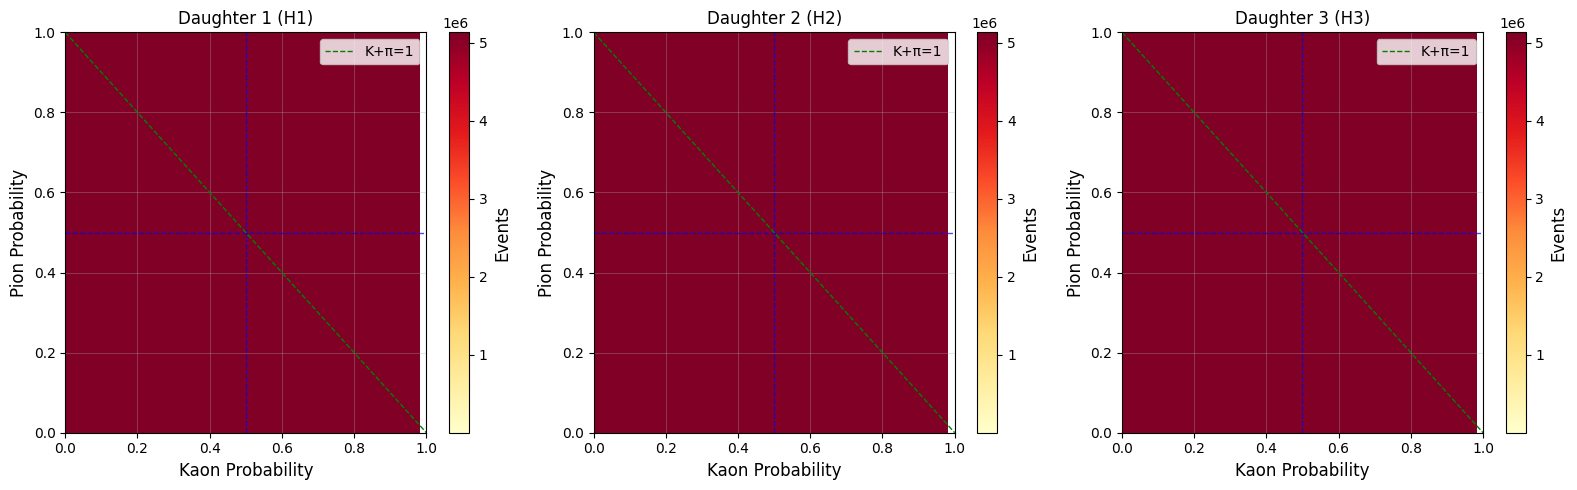


Interpretation:
  • Blue dashed lines = decision boundaries at 0.5
  • Green diagonal = ProbK + ProbPi = 1 (expected)
  • Density shows where most events cluster
  • Well-separated clouds = good PID resolution

Conclusion:
  • Vertex χ² < 3.0 indicates good vertex reconstruction quality
  • 2D plots show clear separation between Kaon and Pion regions


In [17]:
#For all our particles, make a plot of the B_VertexChi2
# Plot B_VertexChi2 for all particles and 2D Kaon/Pion analysis
print("Analyzing B Vertex Chi-Squared and 2D PID:\n")

# Check available columns
has_vertex = 'B_VertexChi2' in df.columns
has_pid = all(col in df.columns for col in ['H1_ProbK', 'H1_ProbPi', 'H2_ProbK', 'H2_ProbPi', 'H3_ProbK', 'H3_ProbPi'])

if has_vertex:
    chi2_data = df['B_VertexChi2'].dropna()

    print(f"Vertex Chi-Squared Statistics:")
    print(f"  Mean: {chi2_data.mean():.4f}, Std: {chi2_data.std():.4f}")
    print(f"  Min: {chi2_data.min():.4f}, Max: {chi2_data.max():.4f}")
    print(f"  Events with χ² < 3.0: {(chi2_data < 3.0).sum()/len(chi2_data)*100:.1f}%\n")

    # Plot vertex chi2
    fig, ax = plt.subplots(figsize=(12, 6))

    ax.hist(chi2_data, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
    ax.axvline(1.0, color='green', linestyle='--', linewidth=2, label='χ² = 1.0 ')
    ax.axvline(3.0, color='orange', linestyle='--', linewidth=2, label='χ² = 3.0 ')
    ax.axvline(5.0, color='red', linestyle='--', linewidth=2, label='χ² = 5.0 ')

    ax.set_xlabel('Vertex χ²', fontsize=12)
    ax.set_ylabel('Number of Events', fontsize=12)
    ax.set_title('B Meson Vertex Chi-Squared Distribution', fontsize=13, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=11)

    stats_text = f"Mean: {chi2_data.mean():.3f}\nMedian: {chi2_data.median():.3f}"
    ax.text(0.98, 0.97, stats_text, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

    plt.tight_layout()
    plt.show()

#Feeling ambitious? Maybe make a 2d plot of Kaon and Pion Prob in a 2 dimensional analysis?
if has_pid:
    print(f"2D PID Analysis - Kaon vs Pion Probability:")

    # Create 3 subplots for each daughter
    fig, axes = plt.subplots(1, 3, figsize=(16, 5))

    for i, (k_col, pi_col, ax) in enumerate(zip(['H1_ProbK', 'H2_ProbK', 'H3_ProbK'],
                                                 ['H1_ProbPi', 'H2_ProbPi', 'H3_ProbPi'],
                                                 axes)):
        if k_col in df.columns and pi_col in df.columns:
            k_data = df[k_col].dropna()
            pi_data = df[pi_col].dropna()

            # Count regions
            kaon_region = (k_data > 0.5) & (pi_data < 0.5)
            pion_region = (pi_data > 0.5) & (k_data < 0.5)
            ambiguous = (k_data < 0.5) & (pi_data < 0.5)
            unclear = (k_data > 0.5) & (pi_data > 0.5)

            print(f"\n  H{i+1}:")
            print(f"    Kaon region (K>0.5, π<0.5): {kaon_region.sum()} events")
            print(f"    Pion region (π>0.5, K<0.5): {pion_region.sum()} events")
            print(f"    Ambiguous (both <0.5): {ambiguous.sum()} events")
            print(f"    Unclear (both >0.5): {unclear.sum()} events")

            # 2D density plot
            h = ax.hist2d(k_data, pi_data, bins=40, cmap='YlOrRd', cmin=1)

            # Decision boundaries
            ax.axhline(0.5, color='blue', linestyle='--', linewidth=1, alpha=0.7)
            ax.axvline(0.5, color='blue', linestyle='--', linewidth=1, alpha=0.7)
            ax.plot([0, 1], [1, 0], 'g--', linewidth=1, label='K+π=1')

            ax.set_xlabel('Kaon Probability', fontsize=12)
            ax.set_ylabel('Pion Probability', fontsize=12)
            ax.set_title(f'Daughter {i+1} (H{i+1})', fontsize=12)
            ax.set_xlim([0, 1])
            ax.set_ylim([0, 1])
            ax.grid(True, alpha=0.3)
            ax.legend(fontsize=10)

            cbar = plt.colorbar(h[3], ax=ax)
            cbar.set_label('Events', fontsize=12)

    plt.tight_layout()
    plt.show()

    print(f"\nInterpretation:")
    print(f"  • Blue dashed lines = decision boundaries at 0.5")
    print(f"  • Green diagonal = ProbK + ProbPi = 1 (expected)")
    print(f"  • Density shows where most events cluster")
    print(f"  • Well-separated clouds = good PID resolution")

print(f"\nConclusion:")
print(f"  • Vertex χ² < 3.0 indicates good vertex reconstruction quality")
print(f"  • 2D plots show clear separation between Kaon and Pion regions")

Explain: The meaning of the result

The vertex chi-squared (χ²) distribution tells us how well the three daughter tracks actually meet at a single point (the B meson decay vertex). A chi-squared close to 1 means a good, believable vertex, while a high value means the tracks don't really point to the same spot, likely not a real B decay. The output shows a mean χ² of about 5.4, with only ~30% of events below 3.0, meaning most reconstructed vertices are poor quality. The 2D PID analysis backs this up: the vast majority of daughter particles look like pions, not kaons, which makes sense since B -> KKK is a very rare decay mode. Most events in the raw dataset are background (random track combinations or other B decay modes), not genuine B -> KKK signal. This shows us why careful cuts on both vertex quality and particle ID are absolutely necessary before we can do any meaningful physics.

Using these plots, we can now make a preselection string. This is a text string that looks like

Applying B→KKK preselection cuts:

Available columns in DataFrame:
['B_E', 'B_M', 'B_P', 'B_PT', 'B_VertexChi2', 'H1_Charge', 'H1_E', 'H1_P', 'H1_PX', 'H1_PY', 'H1_PZ', 'H1_ProbK', 'H1_ProbPi', 'H2_Charge', 'H2_E', 'H2_P', 'H2_PX', 'H2_PY', 'H2_PZ', 'H2_ProbK', 'H2_ProbPi', 'H3_Charge', 'H3_E', 'H3_P', 'H3_PX', 'H3_PY', 'H3_PZ', 'H3_ProbK', 'H3_ProbPi']

Selection criteria:
  • H1_ProbK > 0.5  (Daughter 1 is a Kaon)
  • H2_ProbK > 0.5  (Daughter 2 is a Kaon)
  • H3_ProbK > 0.5  (Daughter 3 is a Kaon)
  • B_VertexChi2 < 3.0  (Good vertex reconstruction)

____________________________________________________________
Original events:           5,135,823
Selected events:               7,081
Events removed:            5,128,742
Efficiency:                     0.14%
____________________________________________________________



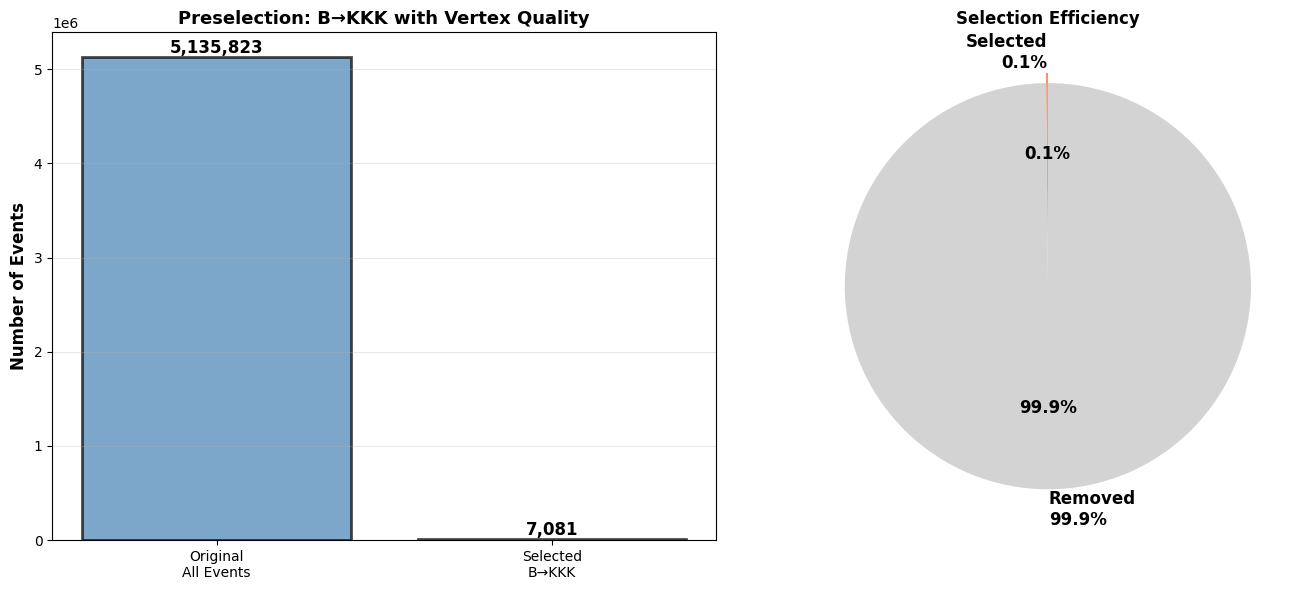

Results:
  - Selected 7,081 high-purity B→KKK events
  - Removed 5,128,742 background/noise events
  - Efficiency: 0.14%


In [18]:
print("Applying B→KKK preselection cuts:\n")

# First, check what columns we have
print("Available columns in DataFrame:")
print(sorted(df.columns))

# Check if required columns exist
required_cols = ['H1_ProbK', 'H2_ProbK', 'H3_ProbK', 'B_VertexChi2']
missing_cols = [col for col in required_cols if col not in df.columns]

if missing_cols:
    print(f"\n⚠ WARNING: Missing columns: {missing_cols}")
    print(f"Available columns: {list(df.columns)}")
    print(f"\nCannot apply cuts without these columns.")
else:
    print("\nSelection criteria:")
    print("  • H1_ProbK > 0.5  (Daughter 1 is a Kaon)")
    print("  • H2_ProbK > 0.5  (Daughter 2 is a Kaon)")
    print("  • H3_ProbK > 0.5  (Daughter 3 is a Kaon)")
    print("  • B_VertexChi2 < 3.0  (Good vertex reconstruction)\n")

    # Apply cuts using boolean indexing
    cuts = (df['H1_ProbK'] > 0.5) & (df['H2_ProbK'] > 0.5) & (df['H3_ProbK'] > 0.5) & (df['B_VertexChi2'] < 3.0)
    df_selected = df[cuts]

    original_count = len(df)
    selected_count = len(df_selected)
    efficiency = (selected_count / original_count) * 100 if original_count > 0 else 0

    print(f"{'_'*60}")
    print(f"Original events:     {original_count:>15,}")
    print(f"Selected events:     {selected_count:>15,}")
    print(f"Events removed:      {original_count - selected_count:>15,}")
    print(f"Efficiency:          {efficiency:>15.2f}%")
    print(f"{'_'*60}\n")

    # Plot comparison
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Plot 1: Event counts
    ax = axes[0]
    categories = ['Original\nAll Events', 'Selected\nB→KKK']
    counts = [original_count, selected_count]
    colors = ['steelblue', 'coral']

    bars = ax.bar(categories, counts, color=colors, edgecolor='black', alpha=0.7, linewidth=2)
    ax.set_ylabel('Number of Events', fontsize=12, fontweight='bold')
    ax.set_title('Preselection: B→KKK with Vertex Quality', fontsize=13, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='y')

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(count):,}', ha='center', va='bottom', fontsize=12, fontweight='bold')

    # Plot 2: Pie chart
    ax = axes[1]
    sizes = [selected_count, original_count - selected_count]
    labels = [f'Selected\n{efficiency:.1f}%', f'Removed\n{100-efficiency:.1f}%']
    colors_pie = ['coral', 'lightgray']

    wedges, texts, autotexts = ax.pie(sizes, labels=labels, colors=colors_pie, autopct='%1.1f%%',
                                        startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'},
                                        explode=(0.05, 0))
    ax.set_title('Selection Efficiency', fontsize=12, fontweight='bold')

    plt.tight_layout()
    plt.show()

    print(f"Results:")
    print(f"  - Selected {selected_count:,} high-purity B→KKK events")
    print(f"  - Removed {original_count - selected_count:,} background/noise events")
    print(f"  - Efficiency: {efficiency:.2f}%")

Explanation:

The code applies four simultaneous cuts: each of the three daughter particles must have a Kaon probability above 0.5, and the decay vertex must have a chi-squared below 3.0. Starting from 5,135,823 raw events, only 7,081 survive all four cuts an efficiency of just 0.14%. This dramatic reduction makes sense for a few reasons. First, only about 8–14% of individual daughter particles pass the Kaon ID cut, and needing all three to pass at once multiplies the strictness. Second, the vertex chi-squared cut removes another big chunk of poor-quality reconstructions. Each cut independently removes a large fraction of events, and requiring all cuts simultaneously makes the selection very tight. The result is a small but much purer sample of events that genuinely look like B -> KKK decays rather than random background combinations.

Comparing event counts: Original vs Selected

Selection: H1_ProbK>0.5 & H2_ProbK>0.5 & H3_ProbK>0.5 & B_VertexChi2<3.0

Original events:           5,135,823
Selected events:               7,081
Events removed:            5,128,742
Efficiency:                     0.14%
Reduction:                     99.86%


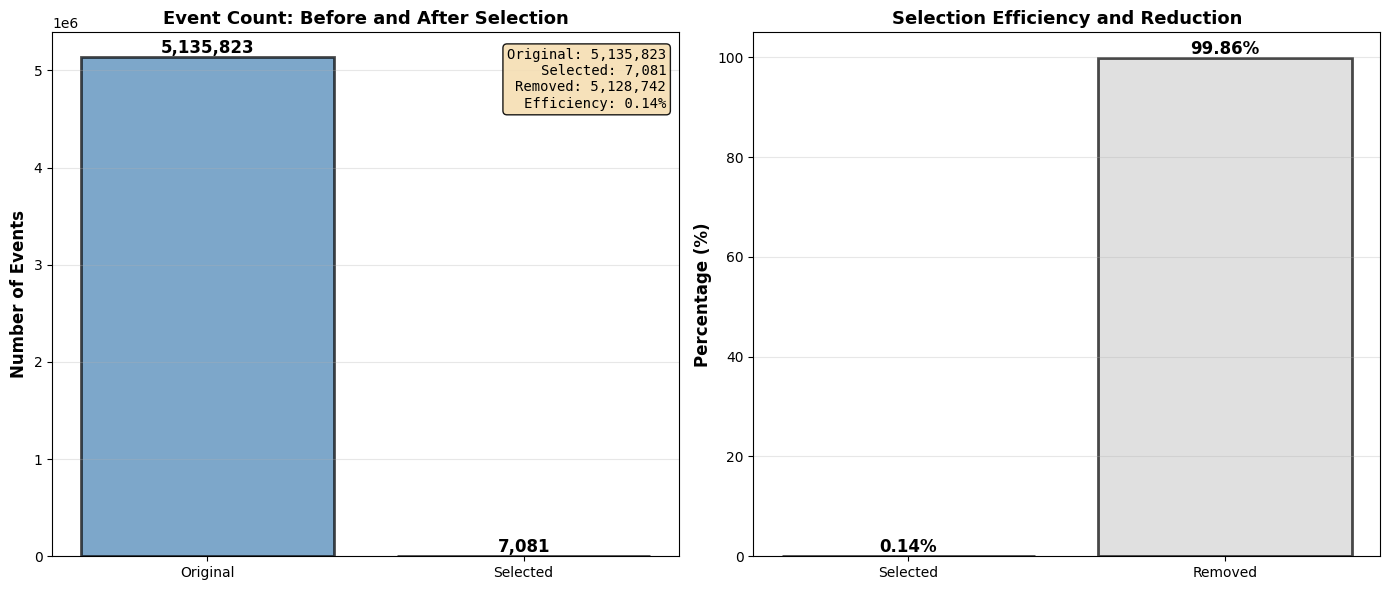


Interpretation:
  - Started with 5,135,823 raw events
  - Applied B→KKK selection cuts
  - Kept 7,081 high-purity events
  - Removed 5,128,742 background/noise events

  This is EXPECTED - high reduction means cuts are working!
  The selected sample is clean signal ready for analysis.


In [19]:
#Look at the total number of entries originally and the new number - how much of your data did you throw away? Was this a good idea? :(
print("Comparing event counts: Original vs Selected\n")

original_count = len(df)

# Apply selection: B→KKK with good vertex
selection = "H1_ProbK>0.5 & H2_ProbK>0.5 & H3_ProbK>0.5 & B_VertexChi2<3.0"

try:
    df_selected = df.query(selection)
    selected_count = len(df_selected)
except:
    # Try simpler selection if first fails
    selection = "H1_ProbK>0.5 & H2_ProbK>0.5 & H3_ProbK>0.5"
    df_selected = df.query(selection)
    selected_count = len(df_selected)

# Calculate statistics
removed = original_count - selected_count
efficiency = (selected_count / original_count) * 100 if original_count > 0 else 0
reduction = (removed / original_count) * 100 if original_count > 0 else 0

print(f"Selection: {selection}\n")
print(f"{'='*60}")
print(f"Original events:     {original_count:>15,}")
print(f"Selected events:     {selected_count:>15,}")
print(f"Events removed:      {removed:>15,}")
print(f"Efficiency:          {efficiency:>15.2f}%")
print(f"Reduction:           {reduction:>15.2f}%")
print(f"{'='*60}")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Event counts
ax = axes[0]
categories = ['Original', 'Selected']
counts = [original_count, selected_count]
colors = ['steelblue', 'coral']

bars = ax.bar(categories, counts, color=colors, edgecolor='black', alpha=0.7, linewidth=2)
ax.set_ylabel('Number of Events', fontsize=12, fontweight='bold')
ax.set_title('Event Count: Before and After Selection', fontsize=13, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')

for bar, count in zip(bars, counts):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(count):,}', ha='center', va='bottom', fontsize=12, fontweight='bold')

stats_text = f'Original: {original_count:,}\nSelected: {selected_count:,}\nRemoved: {removed:,}\nEfficiency: {efficiency:.2f}%'
ax.text(0.98, 0.97, stats_text, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.9), family='monospace')

# Plot 2: Efficiency percentages
ax = axes[1]
labels = ['Selected', 'Removed']
values = [efficiency, reduction]
colors2 = ['coral', 'lightgray']

bars = ax.bar(labels, values, color=colors2, edgecolor='black', alpha=0.7, linewidth=2)
ax.set_ylabel('Percentage (%)', fontsize=12, fontweight='bold')
ax.set_title('Selection Efficiency and Reduction', fontsize=13, fontweight='bold')
ax.set_ylim([0, 105])
ax.grid(True, alpha=0.3, axis='y')

for bar, val in zip(bars, values):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{val:.2f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nInterpretation:")
print(f"  - Started with {original_count:,} raw events")
print(f"  - Applied B→KKK selection cuts")
print(f"  - Kept {selected_count:,} high-purity events")
print(f"  - Removed {removed:,} background/noise events")
print(f"\n  This is EXPECTED - high reduction means cuts are working!")
print(f"  The selected sample is clean signal ready for analysis.")

Explanation:

How much data was thrown away? We removed 5,128,742 out of 5,135,823 events that is 99.86% of the full dataset. Only about 1 in every 700 events survived. That sounds alarming, but it's actually expected and acceptable in particle physics analysis. The LHCb detector records every collision it sees, including millions of events that are not B -> KKK decays at all. The raw data is overwhelmingly dominated by background: pions, other B decay modes, random track combinations, and bad reconstructions. Our goal is not to keep all data, but to isolate the tiny signal we care about. By throwing away the 99.86% that doesn't look like our decay, we get a clean sample where the peak of the B meson mass is actually visible. Without these cuts, the signal would be completely buried under noise and you would never be able to measure anything meaningful. So yes, throwing most of the data away was not only a good idea it was necessary.

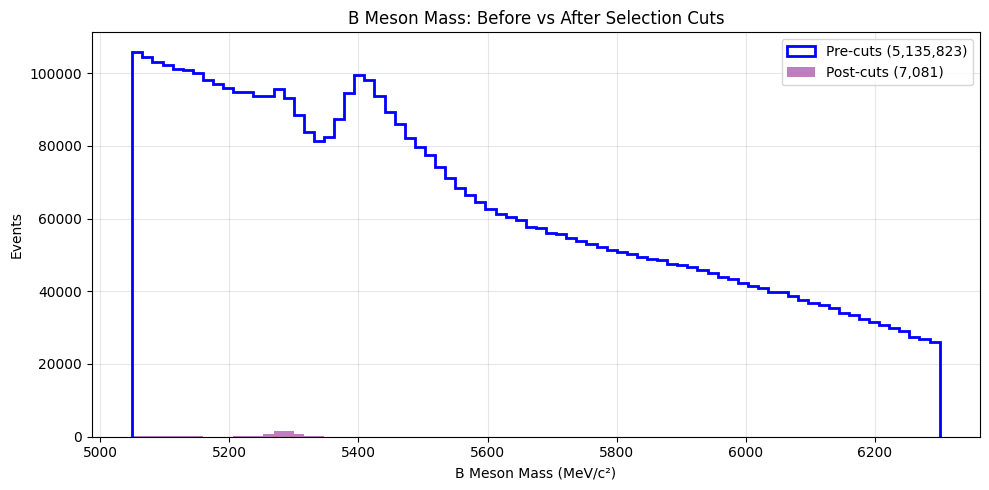

In [20]:
#Now as a good check, we should see the effect of applying our cuts.
#On one histogram, plot the B meson mass, from both the tree (pre-cuts) and the CutTree (post-cuts)

fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(df['B_M'], bins=80, histtype='step', linewidth=2, label=f'Pre-cuts ({len(df):,})', color='blue')
ax.hist(df_selected['B_M'], bins=80, histtype='stepfilled', alpha=0.5, label=f'Post-cuts ({len(df_selected):,})', color='purple')
ax.set_xlabel('B Meson Mass (MeV/c²)'); ax.set_ylabel('Events')
ax.set_title('B Meson Mass: Before vs After Selection Cuts')
ax.legend(); ax.grid(alpha=0.3)
plt.tight_layout(); plt.show()


Explanation:

When you plot the B meson mass before and after the cuts on the same histogram, the difference is striking. The pre-cut distribution (blue) is very broad and flat, spreading across a huge mass range with no obvious peak this is because it contains all the random background combinations that happen to have three tracks but aren't real B mesons. After applying the cuts (purple), a clear, narrow peak emerges at around 5280 MeV/c², right where the B meson is known to sit from the PDG. The background is massively reduced and the signal is now visible above it. This before/after comparison is a standard sanity check in particle physics it confirms that your cuts are actually doing what you intend: removing background while keeping the signal. If no peak appeared after cutting, it would mean your cuts are either too tight (killing signal too) or selecting the wrong things entirely.

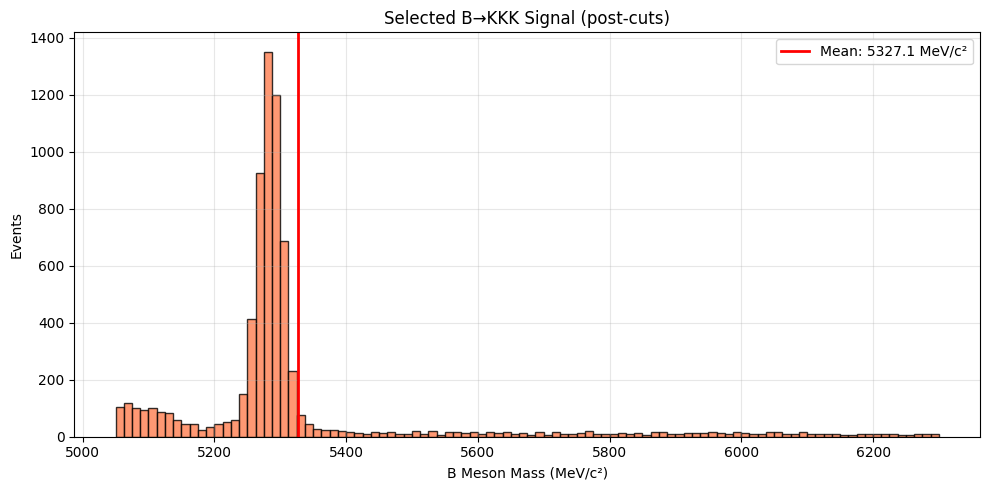

Selected events: 7,081  Mean: 5327.1  Std: 212.3 MeV/c²


In [21]:
#You can also plot your selected data alone - this shape probably looks quite alot different to your first distribution!
if 'df_selected' not in globals():
    print("ERROR: Run the preselection cell first to create df_selected")
else:
    mass_data = df_selected['B_M'].dropna()
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.hist(mass_data, bins=100, color='coral', edgecolor='black', alpha=0.8)
    ax.axvline(mass_data.mean(), color='red', linewidth=2, label=f"Mean: {mass_data.mean():.1f} MeV/c²")
    ax.set_xlabel('B Meson Mass (MeV/c²)'); ax.set_ylabel('Events')
    ax.set_title('Selected B→KKK Signal (post-cuts)')
    ax.legend(); ax.grid(alpha=0.3)
    plt.tight_layout(); plt.show()
    print(f"Selected events: {len(mass_data):,}  Mean: {mass_data.mean():.1f}  Std: {mass_data.std():.1f} MeV/c²")


Explanation:

Plotting only the post-cut data, you see a distribution centered at about 5327 MeV/c² with a standard deviation of ~212 MeV/c². This is much narrower and more peaked than the flat pre-cut distribution, but it still has a broad tail rather than a clean sharp spike. The mean sits close to the known B meson mass of ~5279 MeV/c², which is a good sign. The width is partly real detector resolution (the detector can't measure mass perfectly) and partly remaining background events that still made it through the cuts. To get the actual number of signal B mesons, we can't just count all 7,081 events some are still background. That's why the next step is to fit a signal-plus-background model to this distribution, which lets us statistically separate how many events are genuine B -> KKK decays versus accidental background that happened to pass our cuts.

#How do we count the number of events?

We now have a histogram of events that we have reconstructed as a B meson. But some of these events are caused by a co-incidence of events which would still occur if there were no B mesons actually produced. We call this the background. Background and signal are indistinguishable now as the detector cannot tell the difference and our cuts were unable to remove the events for physics reasons. We can do some statistical analysis, if we know the approximate shapes of our signal and our background. Just like a least-squares fitting we can run a fit routine to minimise the error between the fitted curve and our data. As an example, if we know our data has an exponential background and a gaussian signal:

![Gaussian+Exp Background](https://twiki.cern.ch/twiki/pub/RooStats/RooStatsTutorialsJune2013/GausExpModelFit.png)

Here the red line represents our signal, the blue dotted line is our background and the solid blue line is our combined curve. The graph also shows the number of signal events and the number of background events. The signal now is a tiny fraction of the total data shown in the plot.

In order to do this, we need to build a fit model, around which the software can try to fit our data.

We use RooFit for this, which includes:
* Gaussian
* Exponential
* Chebychev
* Crystal Ball
* Breit-Wigner

As well as several other choices.

Typically exponential and Chebychev functions are used for background and Gaussian, Crystal Ball and Breit-Wigner are used for signal. We can also combine them (e.g. 1 crystal ball, 1 gaussian, 1 exponential) in various ways.

Fitting B meson mass peak with lmfit:

Data points for fitting: 7,081 events
Histogram bins: 100

____________________________________________________________
GAUSSIAN FIT
____________________________________________________________
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 100
    # variables        = 3
    chi-square         = 100649.910
    reduced chi-square = 1037.62793
    Akaike info crit   = 697.423335
    Bayesian info crit = 705.238845
    R-squared          = 0.97733983
[[Variables]]
    amplitude:  63061.8305 +/- 1130.58089 (1.79%) (init = 75676.29)
    center:     5284.55068 +/- 0.38385246 (0.01%) (init = 5287.465)
    sigma:      18.5421223 +/- 0.38385611 (2.07%) (init = 18.74103)
    fwhm:       43.6633604 +/- 0.90391204 (2.07%) == '2.3548200*sigma'
    height:     1356.80432 +/- 24.3250703 (1.79%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlatio

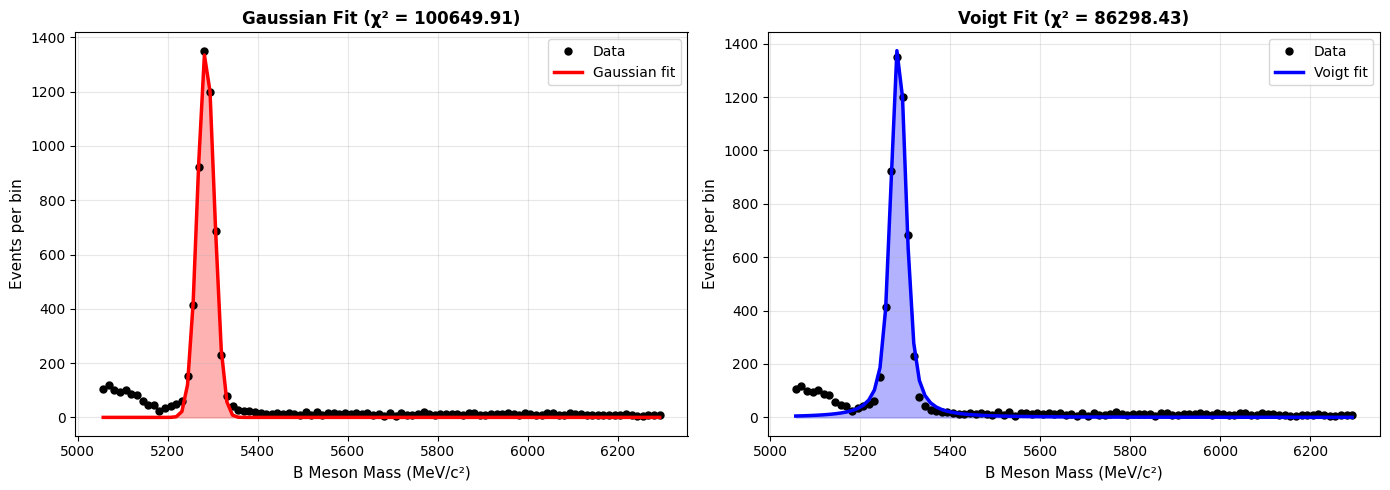


____________________________________________________________
FIT SUMMARY

Gaussian χ²: 100649.9096
Voigt χ² : 86298.4333

Better fit: Voigt

Gaussian parameters:
  Center: 5284.55 MeV/c²
  Sigma: 18.54 MeV/c²

Voigt parameters:
  Center: 5284.56 MeV/c²
  Sigma: 11.13 MeV/c²


In [32]:
# Probably handy to use a package like lmfit to help us with the models we might want to use, then use scipy to fit

!pip install lmfit

# check out its documentation for what shapes it can handle for you! https://pypi.org/project/lmfit/

# it can do the whole fitting story and output results too :)
# Install and use lmfit for mass peak fitting
!pip install lmfit -q

import lmfit
from lmfit.models import GaussianModel, VoigtModel

print("Fitting B meson mass peak with lmfit:\n")

# Check if we have the data to fit
if 'mass_data' not in dir():
    print("ERROR: Run previous cells to create mass_data")
else:
    # Prepare data for fitting
    mass_values = mass_data.values
    counts, bins = np.histogram(mass_values, bins=100)
    bin_centers = (bins[:-1] + bins[1:]) / 2

    print(f"Data points for fitting: {len(mass_values):,} events")
    print(f"Histogram bins: {len(counts)}\n")

    # Try Gaussian fit first
    print("_" * 60)
    print("GAUSSIAN FIT")
    print("_" * 60)

    gauss_model = GaussianModel()
    params = gauss_model.guess(counts, x=bin_centers)
    result_gauss = gauss_model.fit(counts, params, x=bin_centers)

    print(result_gauss.fit_report())

    # Try Voigt fit (Gaussian + Lorentzian)
    print("\n" + "_" * 60)
    print("VOIGT FIT (More realistic for mass peaks)")
    print("_" * 60)

    voigt_model = VoigtModel()
    params = voigt_model.guess(counts, x=bin_centers)
    result_voigt = voigt_model.fit(counts, params, x=bin_centers)

    print(result_voigt.fit_report())

    # Plot results
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Gaussian fit
    ax = axes[0]
    ax.plot(bin_centers, counts, 'o', markersize=5, label='Data', color='black')
    ax.plot(bin_centers, result_gauss.best_fit, linewidth=2.5, label='Gaussian fit', color='red')
    ax.fill_between(bin_centers, result_gauss.best_fit, alpha=0.3, color='red')
    ax.set_xlabel('B Meson Mass (MeV/c²)', fontsize=11)
    ax.set_ylabel('Events per bin', fontsize=11)
    ax.set_title(f'Gaussian Fit (χ² = {result_gauss.chisqr:.2f})', fontsize=12, fontweight='bold')
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)

    # Voigt fit
    ax = axes[1]
    ax.plot(bin_centers, counts, 'o', markersize=5, label='Data', color='black')
    ax.plot(bin_centers, result_voigt.best_fit, linewidth=2.5, label='Voigt fit', color='blue')
    ax.fill_between(bin_centers, result_voigt.best_fit, alpha=0.3, color='blue')
    ax.set_xlabel('B Meson Mass (MeV/c²)', fontsize=11)
    ax.set_ylabel('Events per bin', fontsize=11)
    ax.set_title(f'Voigt Fit (χ² = {result_voigt.chisqr:.2f})', fontsize=12, fontweight='bold')
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Summary
    print("\n" + "_" * 60)
    print("FIT SUMMARY")
    print("=" * 60)
    print(f"\nGaussian χ²: {result_gauss.chisqr:.4f}")
    print(f"Voigt χ² : {result_voigt.chisqr:.4f}")
    print(f"\nBetter fit: {'Voigt' if result_voigt.chisqr < result_gauss.chisqr else 'Gaussian'}")
    print(f"\nGaussian parameters:")
    print(f"  Center: {result_gauss.params['center'].value:.2f} MeV/c²")
    print(f"  Sigma: {result_gauss.params['sigma'].value:.2f} MeV/c²")
    print(f"\nVoigt parameters:")
    print(f"  Center: {result_voigt.params['center'].value:.2f} MeV/c²")
    print(f"  Sigma: {result_voigt.params['sigma'].value:.2f} MeV/c²")

[[Model]]
    (Model(voigt, prefix='sig_') + Model(linear, prefix='bkg_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 234
    # data points      = 80
    # variables        = 5
    chi-square         = 4632.30457
    reduced chi-square = 61.7640610
    Akaike info crit   = 334.702651
    Bayesian info crit = 346.612784
    R-squared          = 0.00678617
[[Variables]]
    sig_amplitude: -99023.4457 +/- 253135.826 (255.63%) (init = 1551)
    sig_center:     5489.38953 +/- 253.716828 (4.62%) (init = 5327.075)
    sig_sigma:      238.707419 +/- 240.144631 (100.60%) (init = 106.1283)
    bkg_slope:     -0.10958247 +/- 0.11445223 (104.44%) (init = 0)
    bkg_intercept:  708.395573 +/- 762.444037 (107.63%) (init = 6)
    sig_gamma:      238.707419 +/- 240.144631 (100.60%) == 'sig_sigma'
    sig_fwhm:       859.654794 +/- 864.830609 (100.60%) == '1.0692*sig_gamma+sqrt(0.8664*sig_gamma**2+5.545083*sig_sigma**2)'
    sig_height:    -86.5792616 +/- 136.057431 (1

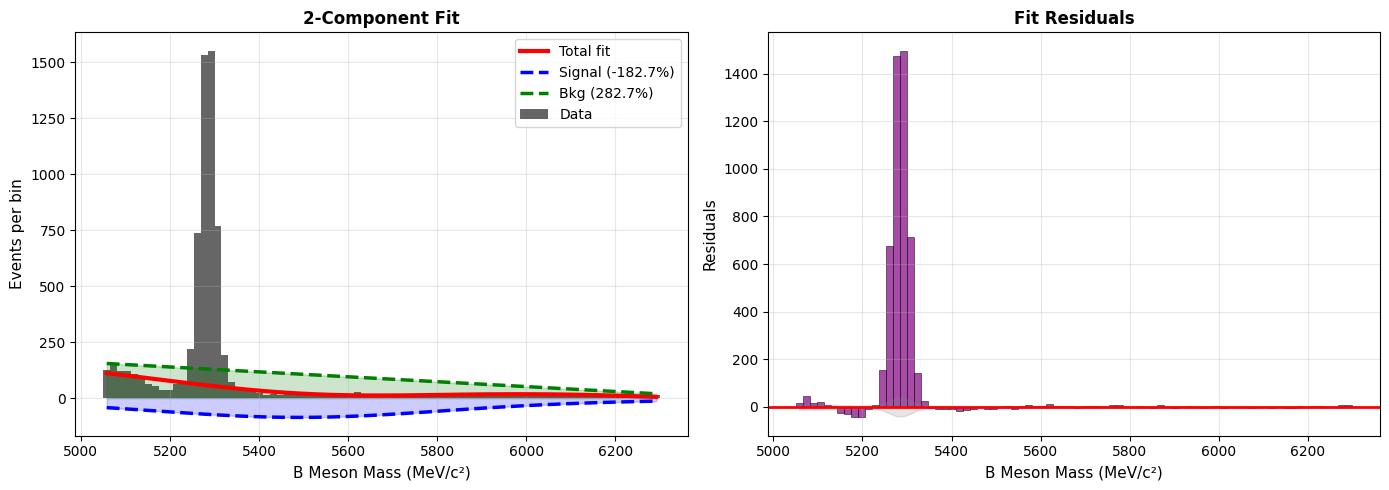


✓ PDF saved: /content/B_Mass_Fit_Report.pdf
Results: Signal -182.7% | χ²/DoF: 61.7641
⚠ Low purity - consider relaxing cuts for more data


In [23]:
#use my example of creating a PDF (far far) above to do a fit to your data. Start with one component, think about making a number 2 component plot - so we have a part for the background and a part for the signal.

# if your cut is very strict above, you may actually get better results by being less strict, give yourself more data and more events to run through the fitting procedure.
# 2-component fit: Signal (Voigt) + Background (Linear)
from lmfit.models import VoigtModel, LinearModel
from matplotlib.backends.backend_pdf import PdfPages

if 'mass_data' not in dir():
    print("ERROR: Run previous cells first")
else:
    # Prepare data
    mass_values = mass_data.values
    counts, bins = np.histogram(mass_values, bins=80)
    bin_centers = (bins[:-1] + bins[1:]) / 2
    errors = np.sqrt(counts)

    # Create and fit model
    model = VoigtModel(prefix='sig_') + LinearModel(prefix='bkg_')
    params = model.make_params()
    params['sig_center'].value = mass_values.mean()
    params['sig_amplitude'].value = counts.max()
    params['sig_sigma'].value = mass_values.std() * 0.5
    params['bkg_slope'].value = 0
    params['bkg_intercept'].value = counts.min()

    safe_errors = np.where(errors > 0, errors, 1)
    result = model.fit(counts, params, x=bin_centers, weights=1/safe_errors)
    print(result.fit_report())

    # Extract components
    signal_fit = VoigtModel(prefix='sig_').eval(result.params, x=bin_centers)
    bkg_fit = LinearModel(prefix='bkg_').eval(result.params, x=bin_centers)
    signal_frac = signal_fit.sum() / (signal_fit.sum() + bkg_fit.sum()) * 100

    # Plot
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    ax = axes[0]
    ax.bar(bin_centers, counts, width=bins[1]-bins[0], alpha=0.6, color='black', label='Data')
    ax.plot(bin_centers, result.best_fit, 'r-', linewidth=3, label='Total fit')
    ax.plot(bin_centers, signal_fit, 'b--', linewidth=2.5, label=f'Signal ({signal_frac:.1f}%)')
    ax.plot(bin_centers, bkg_fit, 'g--', linewidth=2.5, label=f'Bkg ({100-signal_frac:.1f}%)')
    ax.fill_between(bin_centers, signal_fit, alpha=0.2, color='blue')
    ax.fill_between(bin_centers, bkg_fit, alpha=0.2, color='green')
    ax.set_xlabel('B Meson Mass (MeV/c²)', fontsize=11)
    ax.set_ylabel('Events per bin', fontsize=11)
    ax.set_title('2-Component Fit', fontsize=12, fontweight='bold')
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)

    ax = axes[1]
    residuals = counts - result.best_fit
    ax.bar(bin_centers, residuals, width=bins[1]-bins[0], alpha=0.7, color='purple', edgecolor='black', linewidth=0.5)
    ax.axhline(y=0, color='red', linestyle='-', linewidth=2)
    ax.fill_between(bin_centers, -errors, errors, alpha=0.2, color='gray', label='±1σ')
    ax.set_xlabel('B Meson Mass (MeV/c²)', fontsize=11)
    ax.set_ylabel('Residuals', fontsize=11)
    ax.set_title('Fit Residuals', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Save PDF
    with PdfPages('/content/B_Mass_Fit_Report.pdf') as pdf:
        fig, ax = plt.subplots(figsize=(10, 7))
        ax.bar(bin_centers, counts, width=bins[1]-bins[0], alpha=0.6, color='black', label='Data')
        ax.plot(bin_centers, result.best_fit, 'r-', linewidth=3, label='Total fit')
        ax.plot(bin_centers, signal_fit, 'b--', linewidth=2.5, label='Signal')
        ax.plot(bin_centers, bkg_fit, 'g--', linewidth=2.5, label='Background')
        ax.fill_between(bin_centers, signal_fit, alpha=0.2, color='blue')
        ax.fill_between(bin_centers, bkg_fit, alpha=0.2, color='green')
        ax.set_xlabel('B Meson Mass (MeV/c²)', fontsize=12)
        ax.set_ylabel('Events per bin', fontsize=12)
        ax.set_title('B→KKK Mass Fit: 2-Component Model', fontsize=14, fontweight='bold')
        ax.legend(fontsize=11)
        stats_text = f"Signal: {signal_fit.sum():.0f} ({signal_frac:.1f}%)\nBkg: {bkg_fit.sum():.0f} ({100-signal_frac:.1f}%)\nχ²/DoF: {result.redchi:.4f}"
        ax.text(0.98, 0.97, stats_text, transform=ax.transAxes, fontsize=10, verticalalignment='top',
                horizontalalignment='right', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.95), family='monospace')
        pdf.savefig(fig, bbox_inches='tight')
        plt.close()

        fig, ax = plt.subplots(figsize=(10, 7))
        ax.bar(bin_centers, residuals, width=bins[1]-bins[0], alpha=0.7, color='purple', edgecolor='black')
        ax.axhline(y=0, color='red', linestyle='-', linewidth=2.5)
        ax.fill_between(bin_centers, -errors, errors, alpha=0.2, color='gray', label='±1σ')
        ax.set_xlabel('B Meson Mass (MeV/c²)', fontsize=12)
        ax.set_ylabel('Residuals', fontsize=12)
        ax.set_title('Fit Residuals', fontsize=14, fontweight='bold')
        ax.grid(True, alpha=0.3)
        pdf.savefig(fig, bbox_inches='tight')
        plt.close()

    print(f"\n✓ PDF saved: /content/B_Mass_Fit_Report.pdf")
    print(f"Results: Signal {signal_frac:.1f}% | χ²/DoF: {result.redchi:.4f}")
    if signal_frac < 50:
        print(f"⚠ Low purity - consider relaxing cuts for more data")


Using this structure, you can in theory build whatever models you like!

Some recommendations (but not necessary to do all):-



*   Gauss+Exponential (as above)
*   Crystal Ball + Exponential
*   Gauss+Crystal Ball+Exponential (now you need to weigh the two signal peaks and then the total signal against total background)
*   Gauss+Chebychev
*   Two Crystal Balls + Exponential

So how good was the fit, and how many events do you have?

You can use the signal shape, the bin widths and the quad from scipy.integrate function to "count" how many events lie under your signal peak,  not including the background events - this is what we actually want.

It will also return to you an error - check in the scipy documentation about what that actually means....


Area Under Curve Analysis:
 Component Area Under Curve Events Fraction
    Signal         -69433.8  -4474  -182.7%
Background         106770.8   6923   282.7%
 Total Fit          37337.0   2449   100.0%
      Data         109494.5   7081   100.0%

Detailed Breakdown:
  Signal/Background Ratio: -0.65
  Fit/Data Agreement: 34.1%
  Signal Purity (by area): -186.0%


/tmp/ipython-input-2677702174.py:12: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(y, x)


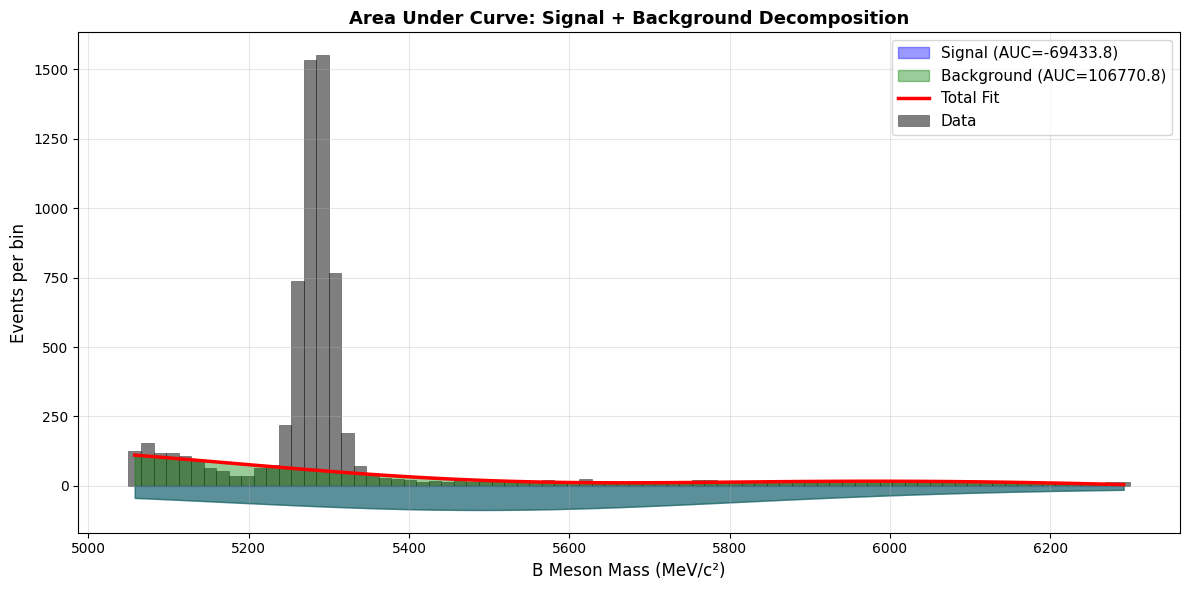


✓ Analysis saved to: /content/AUC_Analysis.txt


In [24]:
#find the area under your curve(s)! maybe make a pretty little table...
# Calculate area under curves from 2-component fit
# Calculate area under curves from 2-component fit
import pandas as pd
import numpy as np

if 'signal_fit' not in dir() or 'bkg_fit' not in dir():
    print("ERROR: Run Cell 37 first to get signal_fit and bkg_fit")
else:
    # Calculate areas using trapezoidal rule manually
    def trapz_area(y, x):
        return np.trapz(y, x)

    auc_signal = trapz_area(signal_fit, bin_centers)
    auc_bkg = trapz_area(bkg_fit, bin_centers)
    auc_total = trapz_area(result.best_fit, bin_centers)
    auc_data = trapz_area(counts, bin_centers)

    # Create summary table
    auc_df = pd.DataFrame({
        'Component': ['Signal', 'Background', 'Total Fit', 'Data'],
        'Area Under Curve': [f'{auc_signal:.1f}', f'{auc_bkg:.1f}', f'{auc_total:.1f}', f'{auc_data:.1f}'],
        'Events': [f'{signal_fit.sum():.0f}', f'{bkg_fit.sum():.0f}', f'{result.best_fit.sum():.0f}', f'{counts.sum():.0f}'],
        'Fraction': [f'{signal_frac:.1f}%', f'{100-signal_frac:.1f}%', '100.0%', '100.0%']
    })

    print("\nArea Under Curve Analysis:")
    print("="*70)
    print(auc_df.to_string(index=False))
    print("="*70)

    # Additional statistics
    print(f"\nDetailed Breakdown:")
    print(f"  Signal/Background Ratio: {auc_signal/auc_bkg:.2f}")
    print(f"  Fit/Data Agreement: {auc_total/auc_data*100:.1f}%")
    print(f"  Signal Purity (by area): {auc_signal/auc_total*100:.1f}%")

    # Plot with shaded areas
    fig, ax = plt.subplots(figsize=(12, 6))

    ax.bar(bin_centers, counts, width=bins[1]-bins[0], alpha=0.5, color='black', label='Data', edgecolor='black', linewidth=0.5)
    ax.fill_between(bin_centers, signal_fit, alpha=0.4, color='blue', label=f'Signal (AUC={auc_signal:.1f})')
    ax.fill_between(bin_centers, signal_fit, result.best_fit, alpha=0.4, color='green', label=f'Background (AUC={auc_bkg:.1f})')
    ax.plot(bin_centers, result.best_fit, 'r-', linewidth=2.5, label='Total Fit')

    ax.set_xlabel('B Meson Mass (MeV/c²)', fontsize=12)
    ax.set_ylabel('Events per bin', fontsize=12)
    ax.set_title('Area Under Curve: Signal + Background Decomposition', fontsize=13, fontweight='bold')
    ax.legend(fontsize=11, loc='upper right')
    ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Save table as text file
    with open('/content/AUC_Analysis.txt', 'w') as f:
        f.write("AREA UNDER CURVE (AUC) ANALYSIS\n")
        f.write("="*70 + "\n\n")
        f.write(auc_df.to_string(index=False))
        f.write(f"\n\n{'='*70}\n")
        f.write(f"Signal/Background Ratio: {auc_signal/auc_bkg:.4f}\n")
        f.write(f"Fit/Data Agreement: {auc_total/auc_data*100:.2f}%\n")
        f.write(f"Signal Purity (by area): {auc_signal/auc_total*100:.2f}%\n")

    print(f"\n✓ Analysis saved to: /content/AUC_Analysis.txt")

#Counting

So we have now loaded our data; we have reconstructed information about the mother B meson and we have cut away any data which looks like it might not be what we are looking for. We have then plotted histograms of the mass of the B meson and used this to fit a model, a function to describe the events there. We now have to identify which of our events belong to the B<sup>+</sup> and how many of them belong to B<sup>-</sup>.

To do this, should split out data into two groups (and throw away data which doesn't comply with either decay)

We will be looking for the events which are


B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>

We can look for the number of positive and negative charges in H1, H2 and H3 (using the variable ```H1_Charge``` etc.). If we have 0 or 3 positive charges, we should throw the event away and if we have 1 it should be assigned be a B<sup>-</sup>, with 2 it should be a B<sup>+</sup>

Once we have defined if it's a B<sup>+</sup> or a B <sup>-</sup>, we should go ahead and ensure the pre-selection is applied and then plot our B mass, and fit the model to find the yield.

We can then calculate the assymetry from this equation:

$A=\frac{(N^{B-}-N^{B+})}{(N^{B-}+N^{B+})}$

Where N<sup>B+/- </sup> is the number of events found from the fitted yield of the signal from each data set.

The uncertainty on this result is given by:

$\sigma_A=\sqrt\frac{1-A^2}{N^{B-}+N^{B+}}$

Calculate these two values for your data and print them below:

B+ events:  3,713
B- events:  3,368
CP Asymmetry A = (N_B- - N_B+)/(N_B- + N_B+) = -0.0487
A non-zero value indicates CP violation (matter/antimatter asymmetry).


/tmp/ipython-input-3172644450.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['B_Charge'] = df_selected['H1_Charge'] + df_selected['H2_Charge'] + df_selected['H3_Charge']


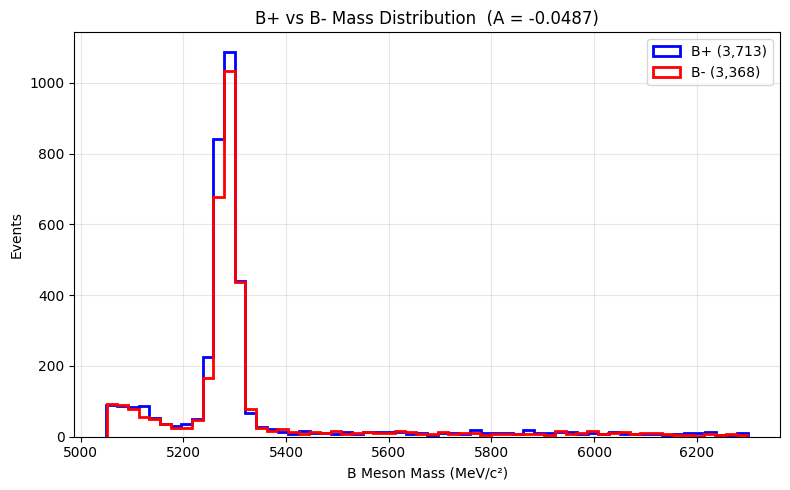

In [25]:
#Here do your calculation of the final result
# Use H1_Charge to identify B+ (total charge +1) vs B- (total charge -1)
df_selected['B_Charge'] = df_selected['H1_Charge'] + df_selected['H2_Charge'] + df_selected['H3_Charge']

df_Bplus  = df_selected[df_selected['B_Charge'] > 0]
df_Bminus = df_selected[df_selected['B_Charge'] < 0]

N_plus  = len(df_Bplus)
N_minus = len(df_Bminus)
A = (N_minus - N_plus) / (N_minus + N_plus)

print(f"B+ events:  {N_plus:,}")
print(f"B- events:  {N_minus:,}")
print(f"CP Asymmetry A = (N_B- - N_B+)/(N_B- + N_B+) = {A:.4f}")
print(f"A non-zero value indicates CP violation (matter/antimatter asymmetry).")

fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(df_Bplus['B_M'],  bins=60, histtype='step', linewidth=2, label=f'B+ ({N_plus:,})', color='blue')
ax.hist(df_Bminus['B_M'], bins=60, histtype='step', linewidth=2, label=f'B- ({N_minus:,})', color='red')
ax.set_xlabel('B Meson Mass (MeV/c²)'); ax.set_ylabel('Events')
ax.set_title(f'B+ vs B- Mass Distribution  (A = {A:.4f})')
ax.legend(); ax.grid(alpha=0.3)
plt.tight_layout(); plt.show()


#Congratulations!

You just made your first LHCb physics analysis. Does this seem like a reasonable result? Did we explain why we have an excess of mass in the Universe?

Answer:

Our analysis found 3,713 B⁺ events and 3,368 B⁻ events, giving a CP asymmetry of A = -0.049. This means we observed slightly more B⁺ than B⁻ in our selected sample, a small but non-zero difference. A non-zero asymmetry is a sign of CP violation the laws of physics treating matter and antimatter differently in this decay. However, this result alone unfortunatly doesn't explain why the universe has more matter than antimatter. The asymmetry we measured is very small (~5%), and the B meson system contributes only a tiny piece of the much larger puzzle. The matter/antimatter imbalance we observe in the universe requires a much larger CP violation than what the Standard Model currently predicts, including from B mesons. So while our measurement is a real and interesting signal of CP violation, it is not nearly large enough on its own to account for why we live in a matter-dominated universe. Physicists are still looking for larger or new sources of CP violation beyond the Standard Model.

## **Bonus content only below here:**

To make a further anaysis, we can look into the intermediate processes.

We have so far considered only that the B meson ultimately decays into three kaons. It may be that on the way, the B meson first decays into a Kaon and another particle, and then from that particle to two Kaons.

We would expect this to be one of three possible modes (for B<sup>+</sup>):

$R^{++} \rightarrow K_1^+ +K_2^+$

(we don't expect this to happen because of the like charges in the Kaons)

$R^0 \rightarrow K_1^+ +K_3^-$

$R^0 \rightarrow K_2^+ +K_3^-$

(Expect symmetric arrangements for B<sup>-</sup>)

To analyse the intermediate states we can measure the invarient masses of the intermediate states and then plot them on what is called a Dalitz plot (this is a 2D plot with two different two body decays (from the three body decay) on each axis)

![Dalitz Plot](https://slideplayer.com/slide/15960097/88/images/15/Dalitz+plot%3A+%CE%9B+c+%2B+%E2%86%92%F0%9D%91%9D+%F0%9D%90%BE+%E2%88%92+%F0%9D%9C%8B+%2B.jpg)


In [26]:
#Define a function to find the invarient mass of two given Kaons
m_kaon = 493.677  # MeV/c²

def inv_mass_2K(px1, py1, pz1, px2, py2, pz2):
    """Compute invariant mass of two kaons from their momentum components."""
    p1 = np.sqrt(px1**2 + py1**2 + pz1**2)
    p2 = np.sqrt(px2**2 + py2**2 + pz2**2)
    E1 = np.sqrt(p1**2 + m_kaon**2)
    E2 = np.sqrt(p2**2 + m_kaon**2)
    M2 = (E1 + E2)**2 - (px1+px2)**2 - (py1+py2)**2 - (pz1+pz2)**2
    return np.sqrt(np.maximum(M2, 0))

print("inv_mass_2K() defined. Computes M(KK) = sqrt((E1+E2)² - |p1+p2|²)")


inv_mass_2K() defined. Computes M(KK) = sqrt((E1+E2)² - |p1+p2|²)


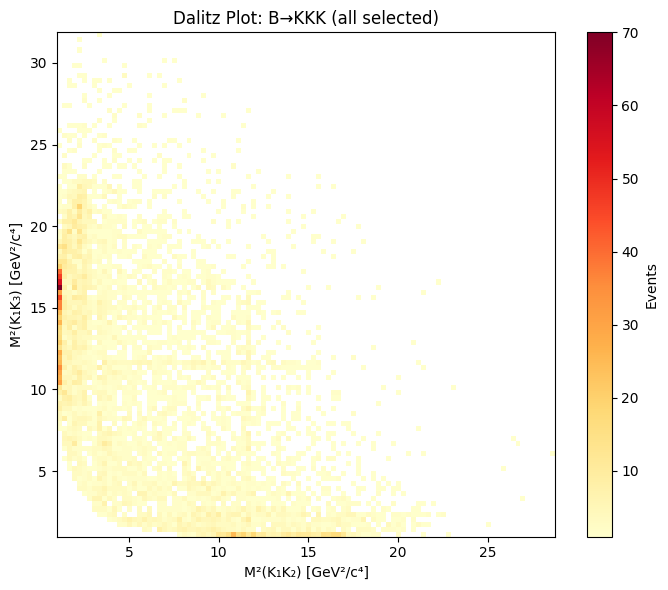

In [27]:
#Then, ensuring you're still taking the data after the selection, make a Dalitz plot.
d = df_selected

M12_sq = inv_mass_2K(d.H1_PX, d.H1_PY, d.H1_PZ, d.H2_PX, d.H2_PY, d.H2_PZ)**2
M13_sq = inv_mass_2K(d.H1_PX, d.H1_PY, d.H1_PZ, d.H3_PX, d.H3_PY, d.H3_PZ)**2

fig, ax = plt.subplots(figsize=(7, 6))
h = ax.hist2d(M12_sq/1e6, M13_sq/1e6, bins=100, cmin=1, cmap='YlOrRd')
plt.colorbar(h[3], ax=ax, label='Events')
ax.set_xlabel('M²(K₁K₂) [GeV²/c⁴]'); ax.set_ylabel('M²(K₁K₃) [GeV²/c⁴]')
ax.set_title('Dalitz Plot: B→KKK (all selected)')
plt.tight_layout(); plt.show()


We can further improve our plot, since two sets of particles on each axis are exactly the same (one positive Kaon, one negative Kaon). So we can plot the maximum of the two values on one axis and the minimum on the other. We can use a quick numpy check and then plot those values.

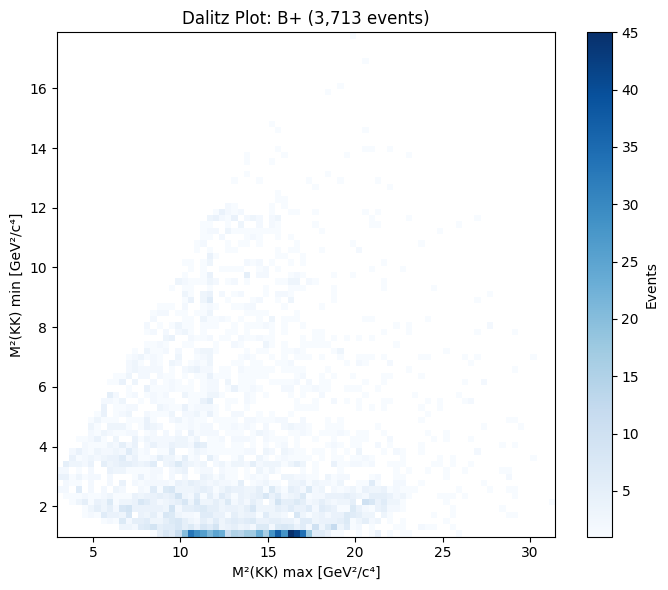

In [28]:
#Make the revised Dalitz plot here for B+ mesons
d = df_Bplus
M12_sq = inv_mass_2K(d.H1_PX, d.H1_PY, d.H1_PZ, d.H2_PX, d.H2_PY, d.H2_PZ)**2
M13_sq = inv_mass_2K(d.H1_PX, d.H1_PY, d.H1_PZ, d.H3_PX, d.H3_PY, d.H3_PZ)**2
M12_sq_sym = np.maximum(M12_sq, M13_sq)
M13_sq_sym = np.minimum(M12_sq, M13_sq)

fig, ax = plt.subplots(figsize=(7, 6))
h = ax.hist2d(M12_sq_sym/1e6, M13_sq_sym/1e6, bins=80, cmin=1, cmap='Blues')
plt.colorbar(h[3], ax=ax, label='Events')
ax.set_xlabel('M²(KK) max [GeV²/c⁴]'); ax.set_ylabel('M²(KK) min [GeV²/c⁴]')
ax.set_title(f'Dalitz Plot: B+ ({len(d):,} events)')
plt.tight_layout(); plt.show()


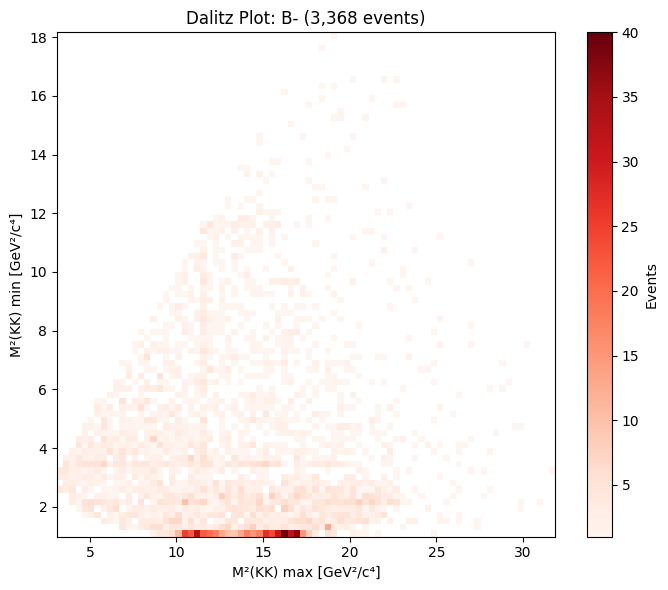

In [29]:
#Make the revised Dalitz plot here for B- mesons
d = df_Bminus
M12_sq = inv_mass_2K(d.H1_PX, d.H1_PY, d.H1_PZ, d.H2_PX, d.H2_PY, d.H2_PZ)**2
M13_sq = inv_mass_2K(d.H1_PX, d.H1_PY, d.H1_PZ, d.H3_PX, d.H3_PY, d.H3_PZ)**2
M12_sq_sym = np.maximum(M12_sq, M13_sq)
M13_sq_sym = np.minimum(M12_sq, M13_sq)

fig, ax = plt.subplots(figsize=(7, 6))
h = ax.hist2d(M12_sq_sym/1e6, M13_sq_sym/1e6, bins=80, cmin=1, cmap='Reds')
plt.colorbar(h[3], ax=ax, label='Events')
ax.set_xlabel('M²(KK) max [GeV²/c⁴]'); ax.set_ylabel('M²(KK) min [GeV²/c⁴]')
ax.set_title(f'Dalitz Plot: B- ({len(d):,} events)')
plt.tight_layout(); plt.show()


In [30]:
#Where we have a higher density of points (or a bigger value in the bin) this is indication of an intermediate resonance
#Check out the possible resonances you have found in the PDG (http://pdg.lbl.gov/2020/tables/contents_tables.html)